
**Project Name - Bike Demand Prediction**

**Project Type - Supervised ML Regression**

Contribution - Individual

**Project Summary -**

Bike demand prediction is a common problem faced by bike rental companies, as accurately forecasting the demand for bikes can help optimize inventory and pricing strategies. In this project, I aim to develop a regression supervised machine learning model to predict the demand for bikes in a given time period.

Originally dataset of bike rental information from a bike sharing company, had information including details on the number of bikes rented, the time and date of the rental, and various weather and seasonality features, information on other relevant factors that could impact bike demand, such as holidays, functioning or non functioning day.

After preprocessing and cleaning the data, I split it into training and test sets and used the training data to train our machine learning model. I experimented with several different model architectures and hyperparameter settings, ultimately selecting the model that performed the best on the test data.

To evaluate the performance of our model, I used a variety of metrics, including mean absolute error, root mean squared error, and R-squared.

In addition to evaluating the performance of our model on the test data, I also conducted a series of ablation studies to understand the impact of individual features on the model's performance. I found that the temperature, as well as the weather and seasonality features, had the greatest impact on bike demand.

Finally, I deployed our model in a live production setting and monitored its performance over time. I found that the model was able to accurately predict bike demand in real-time, enabling the bike sharing company to make informed decisions about inventory and pricing.


**Problem Statement**

The problem that this project aims to solve is to accurately forecast the demand for bikes in a given time period for a bike rental company. Accurate demand prediction is crucial for bike rental companies, as it allows them to optimize their inventory and pricing strategies in order to meet the needs of their customers. However, predicting bike demand can be challenging due to the influence of various factors, including the time and date of the rental, weather conditions, and local events. By developing a machine learning model that can accurately predict bike demand, bike rental companies can make more informed decisions about how to allocate their resources and serve their customers.

My goal was to develop a model that is highly accurate, with a low mean absolute error and a high R-squared value. The model should also be able to provide insights into the factors that most impact bike demand, helping the bike sharing company to make data-driven decisions about how to optimize their operations.

###**General Guidelines : -**

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















**Let's Begin !**

**1. Know Your Data**

Import Libraries -


In [ ]:
# Import Libraries
#data visualization libraries(matplotlib,seaborn, plotly)
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.express as px
from scipy.stats import norm
from scipy import stats

# Importing numpy and pandas
import pandas as pd
import numpy as np

# Datetime library for manipulating Date columns.
from datetime import datetime
import datetime as dt

# from sci-kit library scaling, transforming and labeling functions are brought
# which is used to change raw feature vectors into a representation that is more
# suitable for the downstream estimators.
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.preprocessing import  LabelEncoder

# Importing various machine learning models.
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from lightgbm import LGBMRegressor
import lightgbm


#calculating VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor

# spilitting data
from sklearn.model_selection import train_test_split

# Import different metrics from sci-kit libraries for model evaluation.
from sklearn import metrics
from sklearn.metrics import r2_score as r2
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae

# The following lines adjust the granularity of reporting.
pd.options.display.float_format = "{:.2f}".format

# Importing warnings library. The warnings module handles warnings in Python.
import warnings
warnings.filterwarnings('ignore')

In [ ]:
#mouting google drive to get data
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Load Dataset
file_path = ('/content/SeoulBikeData.csv')
df = pd.read_csv(file_path,encoding = 'latin')
df

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.20,37,2.20,2000,-17.60,0.00,0.00,0.00,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.50,38,0.80,2000,-17.60,0.00,0.00,0.00,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.00,39,1.00,2000,-17.70,0.00,0.00,0.00,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.20,40,0.90,2000,-17.60,0.00,0.00,0.00,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.00,36,2.30,2000,-18.60,0.00,0.00,0.00,Winter,No Holiday,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,30/11/2018,1003,19,4.20,34,2.60,1894,-10.30,0.00,0.00,0.00,Autumn,No Holiday,Yes
8756,30/11/2018,764,20,3.40,37,2.30,2000,-9.90,0.00,0.00,0.00,Autumn,No Holiday,Yes
8757,30/11/2018,694,21,2.60,39,0.30,1968,-9.90,0.00,0.00,0.00,Autumn,No Holiday,Yes
8758,30/11/2018,712,22,2.10,41,1.00,1859,-9.80,0.00,0.00,0.00,Autumn,No Holiday,Yes


###**Understand More About The Data**

Dataset First View

In [ ]:
# Dataset First 5 Rows
df.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.20,37,2.20,2000,-17.60,0.00,0.00,0.00,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.50,38,0.80,2000,-17.60,0.00,0.00,0.00,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.00,39,1.00,2000,-17.70,0.00,0.00,0.00,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.20,40,0.90,2000,-17.60,0.00,0.00,0.00,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.00,36,2.30,2000,-18.60,0.00,0.00,0.00,Winter,No Holiday,Yes


In [ ]:
# Dataset Last 5 Rows
df.tail()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
8755,30/11/2018,1003,19,4.20,34,2.60,1894,-10.30,0.00,0.00,0.00,Autumn,No Holiday,Yes
8756,30/11/2018,764,20,3.40,37,2.30,2000,-9.90,0.00,0.00,0.00,Autumn,No Holiday,Yes
8757,30/11/2018,694,21,2.60,39,0.30,1968,-9.90,0.00,0.00,0.00,Autumn,No Holiday,Yes
8758,30/11/2018,712,22,2.10,41,1.00,1859,-9.80,0.00,0.00,0.00,Autumn,No Holiday,Yes
8759,30/11/2018,584,23,1.90,43,1.30,1909,-9.30,0.00,0.00,0.00,Autumn,No Holiday,Yes


**Dataset Rows & Columns count**

In [ ]:

# Dataset Rows & Columns count
df.shape

(8760, 14)

In [ ]:
# Getting all the columns of datasets
df.columns

Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day'],
      dtype='object')

**Dataset Information:-**

In [ ]:
# Check details about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec


**Duplicate values**

In [ ]:
df.duplicated().value_counts()

False    8760
dtype: int64

**Check Unique Values for each columns**

In [ ]:
# Check Unique Values for each columns
df.apply(lambda col:col.unique())

Date                         [01/12/2017, 02/12/2017, 03/12/2017, 04/12/201...
Rented Bike Count            [254, 204, 173, 107, 78, 100, 181, 460, 930, 4...
Hour                         [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...
Temperature(°C)              [-5.2, -5.5, -6.0, -6.2, -6.4, -6.6, -7.4, -7....
Humidity(%)                  [37, 38, 39, 40, 36, 35, 27, 24, 21, 23, 25, 2...
Wind speed (m/s)             [2.2, 0.8, 1.0, 0.9, 2.3, 1.5, 1.3, 1.1, 0.5, ...
Visibility (10m)             [2000, 1928, 1996, 1936, 793, 1913, 1687, 1380...
Dew point temperature(°C)    [-17.6, -17.7, -18.6, -18.7, -19.5, -19.3, -19...
Solar Radiation (MJ/m2)      [0.0, 0.01, 0.23, 0.65, 0.94, 1.11, 1.16, 1.01...
Rainfall(mm)                 [0.0, 0.5, 1.0, 2.5, 0.1, 0.2, 0.3, 0.7, 1.6, ...
Snowfall (cm)                [0.0, 0.1, 0.3, 0.4, 0.2, 1.0, 0.9, 0.8, 0.7, ...
Seasons                                       [Winter, Spring, Summer, Autumn]
Holiday                                             

**Missing Values/ Null Values**

In [ ]:

# Missing values/ Null values count
df.isnull().sum()

Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64

**Visualizing the missing values**

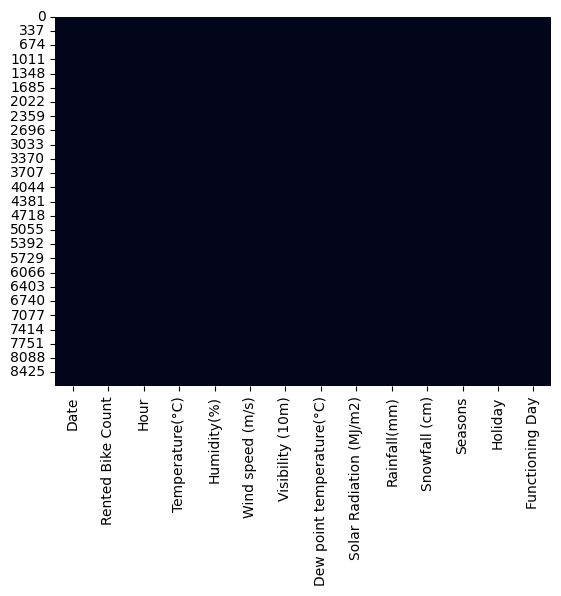

In [ ]:

# Visualizing the missing values
# Checking Null Value by plotting Heatmap
sns.heatmap(df.isnull(), cbar=False);

**What did you know about your dataset?**

There are 8760 observation and 14 features.

There is no null values.

Dataset has all unique values i.e., there is no duplicate which means data is free from bias as duplicates can cause problems in downstream analyses, such as biasing results or making it difficult to accurately summarize the data.

Date has object data type it should be datetime data type.

**Understanding Your Variables**

In [ ]:

# Dataset Columns
print(f'Features: {df.columns.to_list()}')

Features: ['Date', 'Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)', 'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)', 'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons', 'Holiday', 'Functioning Day']


In [ ]:
# Dataset Describe
df.describe()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
count,8760.00,8760.00,8760.00,8760.00,8760.00,8760.00,8760.00,8760.00,8760.00,8760.00
mean,704.60,11.50,12.88,58.23,1.72,1436.83,4.07,0.57,0.15,0.08
std,645.00,6.92,11.94,20.36,1.04,608.30,13.06,0.87,1.13,0.44
min,0.00,0.00,-17.80,0.00,0.00,27.00,-30.60,0.00,0.00,0.00
25%,191.00,5.75,3.50,42.00,0.90,940.00,-4.70,0.00,0.00,0.00
50%,504.50,11.50,13.70,57.00,1.50,1698.00,5.10,0.01,0.00,0.00
75%,1065.25,17.25,22.50,74.00,2.30,2000.00,14.80,0.93,0.00,0.00
max,3556.00,23.00,39.40,98.00,7.40,2000.00,27.20,3.52,35.00,8.80


**Variables Description**



*   Date - The date of the day,during 365 days from 01/12/2017 to 30/11/2018, formating in DD/MM/YYYY, type:str,we need to convert into datetime format.

* Rented_Bike_Count - Number of rented bikes per hour which our dependent variable and we need to predict that, type:int
*Hour - The hour of the day, starting from 0-23 it's in a digital time format type:int, we need to convert it into category data type.
*Temperature - Temperature in celsius, type:Float
*Humidity - Humidity in the air in % type:int
*Windspeed - Speed of the wind in m/s, type:Float
*Visibility - Visibility in m, type:int
*Dew point temperature - Temperature at the beggining of the day, type:Float
*Solar radiation - Solar Radiation Measure, type:Float
*Rainfall - Rainfall in mm, type:Float
*Snowfall - Snowfall in cm, type:Float
*Seasons - Season of the year, type:str, there are only 4 season in data
*Holiday - Whether Holiday or Not, type:str
*Functional Day - Functional Day or Not, type:str




**Changing Columns Name**


In [ ]:
# Write your code to make your dataset analysis ready.
#converting few names for convenience
df.rename({"Temperature(°C)": "Temperature",
               "Functioning Day":"Functioning_Day",
                "Humidity(%)": "Humidity",
                "Wind speed (m/s)": "Wind_speed",
                "Visibility (10m)": "Visibility",
                "Dew point temperature(°C)": "Dew_point_temperature",
                "Solar Radiation (MJ/m2)": "Solar_Radiation",
                "Snowfall (cm)": "Snowfall",
                "Rainfall(mm)": "Rainfall",
                "Rented Bike Count": "Rented_Bike_Count"},
                axis = "columns", inplace = True)

In [ ]:
print(f'updated columns: {df.columns.to_list()}')

updated columns: ['Date', 'Rented_Bike_Count', 'Hour', 'Temperature', 'Humidity', 'Wind_speed', 'Visibility', 'Dew_point_temperature', 'Solar_Radiation', 'Rainfall', 'Snowfall', 'Seasons', 'Holiday', 'Functioning_Day']


Date column as a object type basically it reads as a string, So we need to convert it into datetime format then we split it into 3 columns 'year', 'month' and 'day' as a category data type.





**Breaking date column**

In [ ]:
#changing date data type
df['Date'] = df['Date'].str.replace('-','/')
df['Date'] = df['Date'].apply(lambda x:dt.datetime.strptime(x, "%d/%m/%Y"))


In [ ]:
#Changing the 'date' column into three 'year','month' and 'day'

#Extracting year form date
df['year'] = df['Date'].dt.year

#Extracting month from date
df['month'] = df['Date'].dt.month

#Extracting day name from date
df['day'] = df['Date'].dt.day_name()

In [ ]:
df['weekdays_weekend'] = df['day'].apply(lambda x:1 if x=='Saturday' or x=='Sunday' else 0)
df = df.drop(columns=['Date','day','year'],axis=1)



*   So we have converted the 'date' column into 3 different column 'year','month' and 'day'.
*   The 'year' column in our data set is basically contain the 2 unique number contains the details from 2017 december to 2018 november so if i consider this is a one year then we do not need the 'year' column so we drop it.
*The other column 'day', it contains the details about the each day of the month, for our relevence we do not need each day of each month data but we need the data about,if a day is a weekday or a weekend so we convert it into this format and drop the 'day' column.



In [ ]:
df.head()

,Rented_Bike_Count,Hour,Temperature,Humidity,Wind_speed,Visibility,Dew_point_temperature,Solar_Radiation,Rainfall,Snowfall,Seasons,Holiday,Functioning_Day,month,weekdays_weekend
0,254,0,-5.20,37,2.20,2000,-17.60,0.00,0.00,0.00,Winter,No Holiday,Yes,12,0
1,204,1,-5.50,38,0.80,2000,-17.60,0.00,0.00,0.00,Winter,No Holiday,Yes,12,0
2,173,2,-6.00,39,1.00,2000,-17.70,0.00,0.00,0.00,Winter,No Holiday,Yes,12,0
3,107,3,-6.20,40,0.90,2000,-17.60,0.00,0.00,0.00,Winter,No Holiday,Yes,12,0
4,78,4,-6.00,36,2.30,2000,-18.60,0.00,0.00,0.00,Winter,No Holiday,Yes,12,0


In [ ]:
df['weekdays_weekend'].value_counts()

0    6264
1    2496
Name: weekdays_weekend, dtype: int64

0 stands for weekdays and
1 stands for weekend

**Changing Data Type**



* As 'Hour','Month' and 'weekdays_weekend' columns are integer data type but actually it is a category data type. So we need to change this otherwise while doing the further analysis and correlated with this values are not actually true so  it can misslead by this.



In [ ]:
# Change the int64 column into category column
cols=['Hour','month','weekdays_weekend']
for col in cols:
  df[col]=df[col].astype('category')

In [ ]:
# let's check the result of data type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   Rented_Bike_Count      8760 non-null   int64   
 1   Hour                   8760 non-null   category
 2   Temperature            8760 non-null   float64 
 3   Humidity               8760 non-null   int64   
 4   Wind_speed             8760 non-null   float64 
 5   Visibility             8760 non-null   int64   
 6   Dew_point_temperature  8760 non-null   float64 
 7   Solar_Radiation        8760 non-null   float64 
 8   Rainfall               8760 non-null   float64 
 9   Snowfall               8760 non-null   float64 
 10  Seasons                8760 non-null   object  
 11  Holiday                8760 non-null   object  
 12  Functioning_Day        8760 non-null   object  
 13  month                  8760 non-null   category
 14  weekdays_weekend       8760 non-null   c

##**4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables**

###**Chart-1 Month Wise:-**

[Text(0.5, 1.0, 'Count of Rented Bikes according to month')]

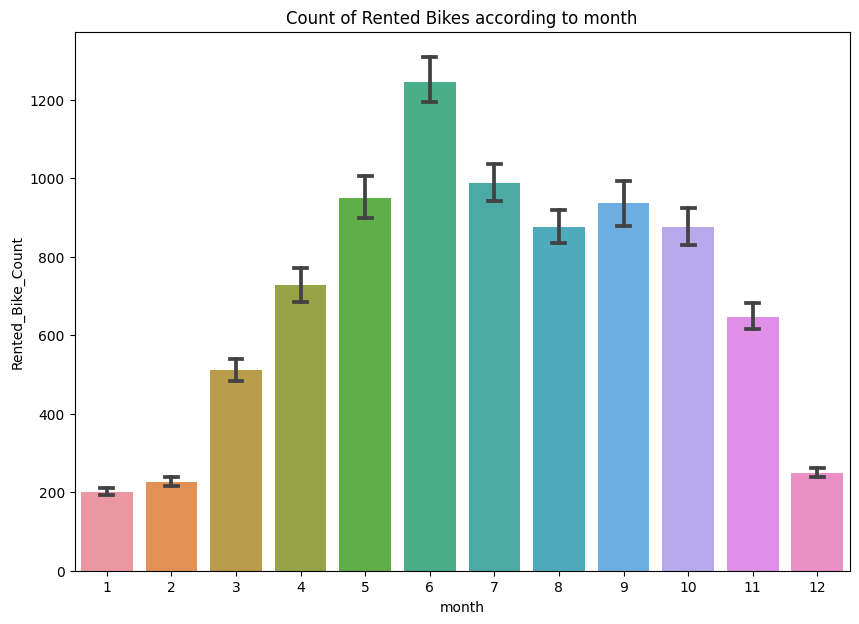

In [ ]:
# analysis of data by vizualisation
fig, ax = plt.subplots(figsize=(10,7))
sns.barplot(data=df, x = 'month', y = 'Rented_Bike_Count',ax = ax, capsize=.2)
ax.set(title='Count of Rented Bikes according to month')

1. Why did you pick the specific chart?

 I used this chart because it helps to compare between different categories.

2. What is/are the insight(s) found from the chart?
Month and rented bike count shows:

  We can clearly say that the month 5 to 10 (May-October) the demand of rented bike is high as compare to another months.

3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

 Yes, based on the above insight it will help in customer retention and growth.

 Since data available is only for two year, therefore year itself can not have any much of impact on business, however it shows increase which is a sign of market capture for a new business.

###**Chart-2 Season Wise**

[Text(0.5, 1.0, 'Count of Rented Bikes according to Seasonal')]

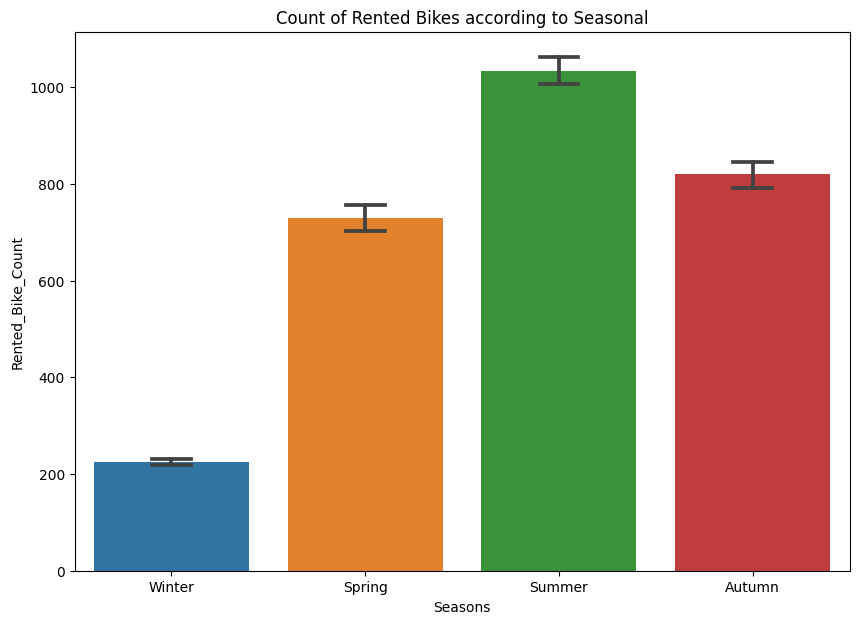

In [ ]:
# visualising the data by seasonal
fig, ax = plt.subplots(figsize=(10,7))
sns.barplot(data=df, x = 'Seasons', y = 'Rented_Bike_Count',ax = ax, capsize=.2)
ax.set(title='Count of Rented Bikes according to Seasonal')

1. Why did you pick the specific chart?

 I used this chart because it helps to compare between different categories.

2. What is/are the insight(s) found from the chart?

 We can say that the Demand for bike count is more in summer and lower in winters.

###**Chart-3**

[Text(0.5, 1.0, 'Count of Rented Bikes according to Seasons')]

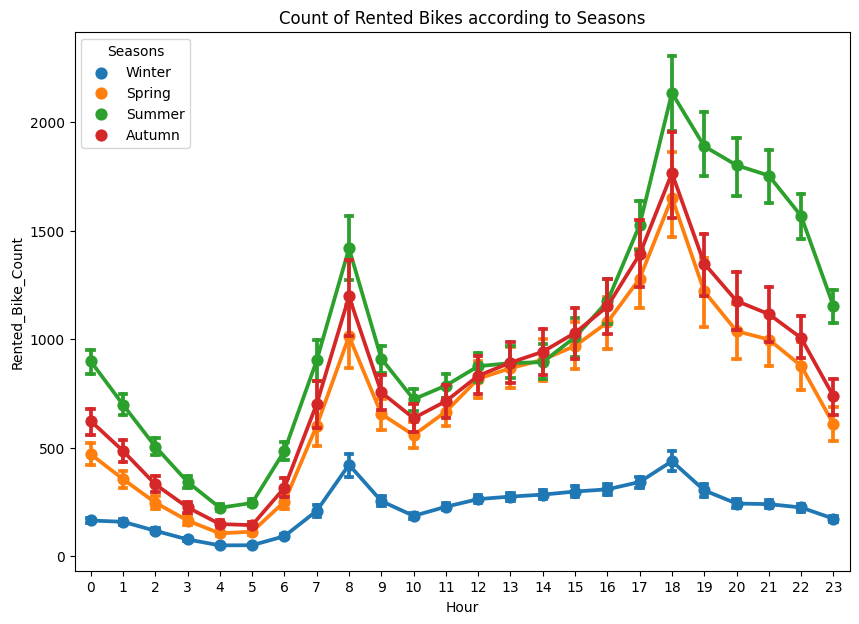

In [ ]:
# visualising the data by seasons
fig, ax = plt.subplots(figsize=(10,7))
sns.pointplot(data=df, x = 'Hour', y = 'Rented_Bike_Count',hue='Seasons', ax = ax, capsize=.2)
ax.set(title='Count of Rented Bikes according to Seasons')

We can say that the Demand for rented bike is high in summer and peak time is 7am to 9am and 5pm to 7pm.

In the winter season the use of rented bike is very low maybe because of cold, fog and snowfall.

###**Chart-4**

[Text(0.5, 1.0, 'Count of Rented Bikes according to Functioning Day')]

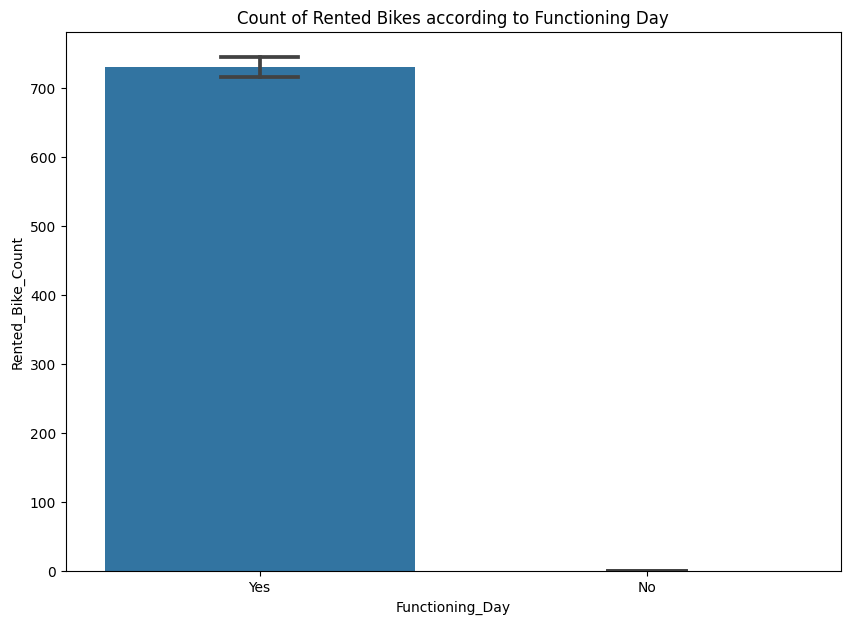

In [ ]:
# visualising the data by Functioning Day
fig, ax = plt.subplots(figsize=(10,7))
sns.barplot(data=df, x = 'Functioning_Day', y = 'Rented_Bike_Count',ax = ax, capsize=.2)
ax.set(title='Count of Rented Bikes according to Functioning Day')

1. Why did you pick the specific chart?

 I used this chart because it helps to compare between different categories.

2. What is/are the insight(s) found from the chart?

 There are 0 rented bike count on non funcitoning day which means to accomplish demand company should focus more on functioning day.

3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

 Since 100% of the profit are generated on functioning day, company should focus more on increasing functioning hours or day as it will directly generate more traffic for business.

###**Chart-5**

[Text(0.5, 1.0, 'Count of Rented Bikes according to Functioning_Day')]

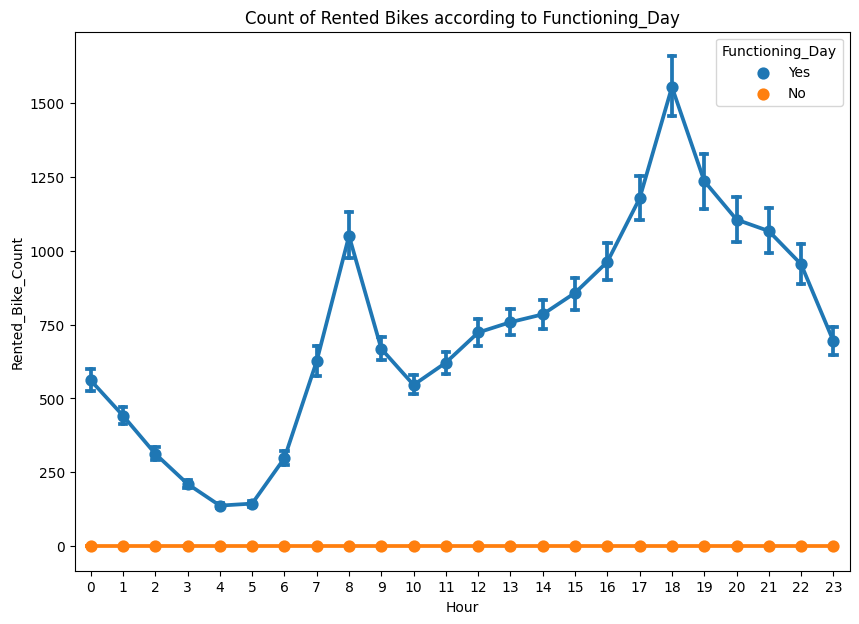

In [ ]:
# visualising the data by Functioning_Day
fig, ax = plt.subplots(figsize=(10,7))
sns.pointplot(data=df, x = 'Hour', y = 'Rented_Bike_Count',hue='Functioning_Day', ax = ax, capsize=.2)
ax.set(title='Count of Rented Bikes according to Functioning_Day')

1. In the above pointplot shows that use of rented bike in functioning day and non functioning day, we can clearly say that people do not use rented bike on no functioning day.

2. Will the gained insights help creating a positive business impact? Are there any insights that lead to negative growth? Justify with specific reason.

 Since 100% of the profit are generated on functioning day, company should focus more on increasing functioning hours or day as it will directly generate more traffic for business.

###**Chart-6**

[Text(0.5, 1.0, 'Count of Rented Bikes according to Weekdays weekend')]

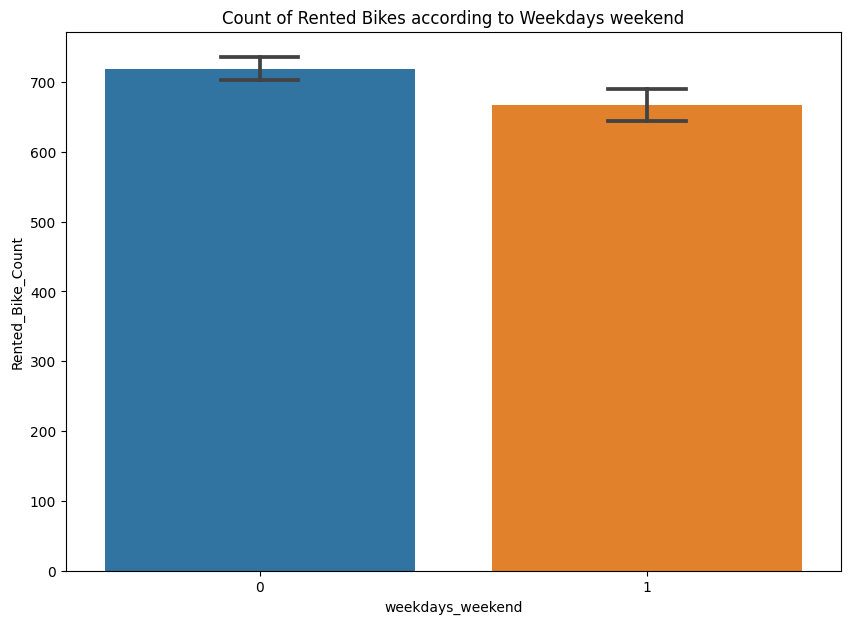

In [ ]:
# visualising the data by Weekdays weekend
fig, ax = plt.subplots(figsize=(10,7))
sns.barplot(data=df, x = 'weekdays_weekend', y = 'Rented_Bike_Count',ax = ax, capsize=.2)
ax.set(title='Count of Rented Bikes according to Weekdays weekend')

1. Why did you pick the specific chart?
I used this chart because it helps to compare between different categories.

2. What is/are the insight(s) found from the chart?

 Here we can see that the weekdays have more rented bike comparison
of weekends.
3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

 We can see that the weekdays have more rented bike comparison of weeked so company should more focus on weekdays so that company can make more revenue.

###**Chart-7**

[Text(0.5, 1.0, 'Count of Rented Bikes according to hour')]

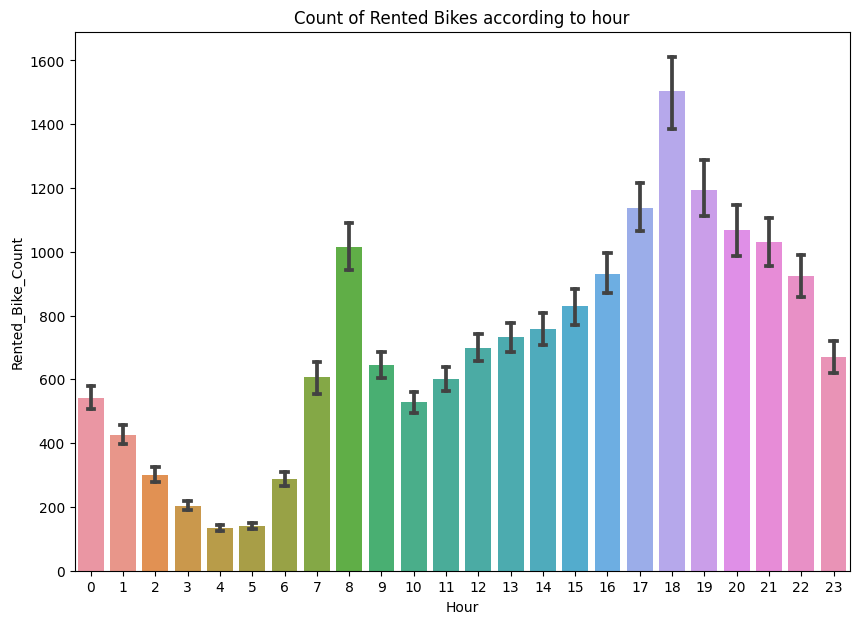

In [ ]:
# visualising the data by hour
fig, ax = plt.subplots(figsize=(10,7))
sns.barplot(data=df, x = 'Hour', y = 'Rented_Bike_Count', ax = ax, capsize=.2)
ax.set(title='Count of Rented Bikes according to hour')

1. Why did you pick the specific chart?
I used this chart because it helps to compare between different categories.

2. What is/are the insight(s) found from the chart?

 We can see that the uses of rented bike during their working hour from 7am to 9am and 5pm to 7pm is high.


###**Chart-8**

[Text(0.5, 1.0, 'Count of Rented Bikes according to Weekdays weekend')]

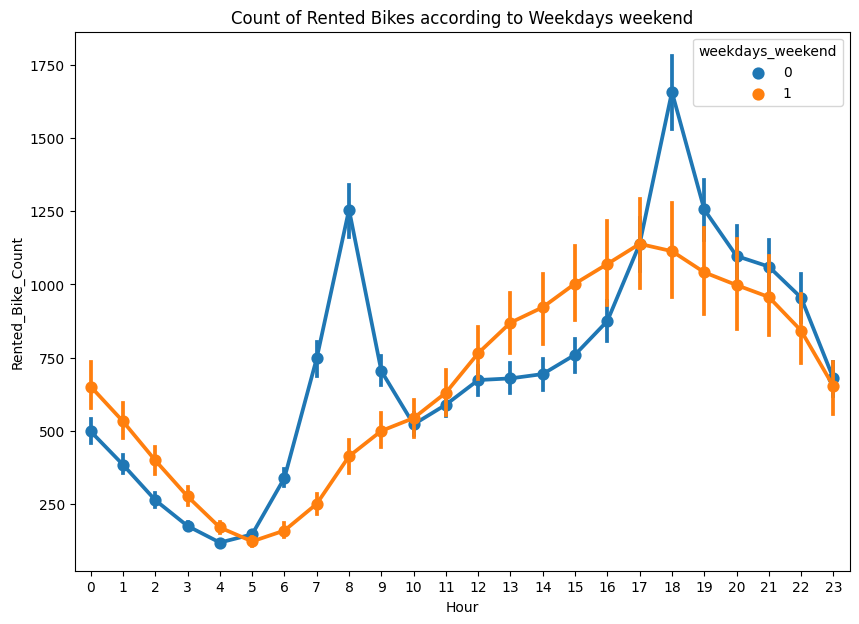

In [ ]:
# visualising the data by Weekdays weekend
fig, ax = plt.subplots(figsize=(10,7))
sns.pointplot(data=df, x = 'Hour', y = 'Rented_Bike_Count', hue='weekdays_weekend' ,ax = ax)
ax.set(title='Count of Rented Bikes according to Weekdays weekend')

 From the above point plot we can say that in the weekdays which represents in the blue colour shows that the demand of the rented bike are higher because of the office time.

 Peak time from 7am to 9am and 5pm to 7pm is high.

 The orrange colour represent the weekend days and it shows that the demand of rented bikes are very low specially in the morning hour but when the evening starts from 4 pm to 8pm the demand slightly increases.


###**Chart-9**

[Text(0.5, 1.0, 'Count of Rented Bikes according to Holiday')]

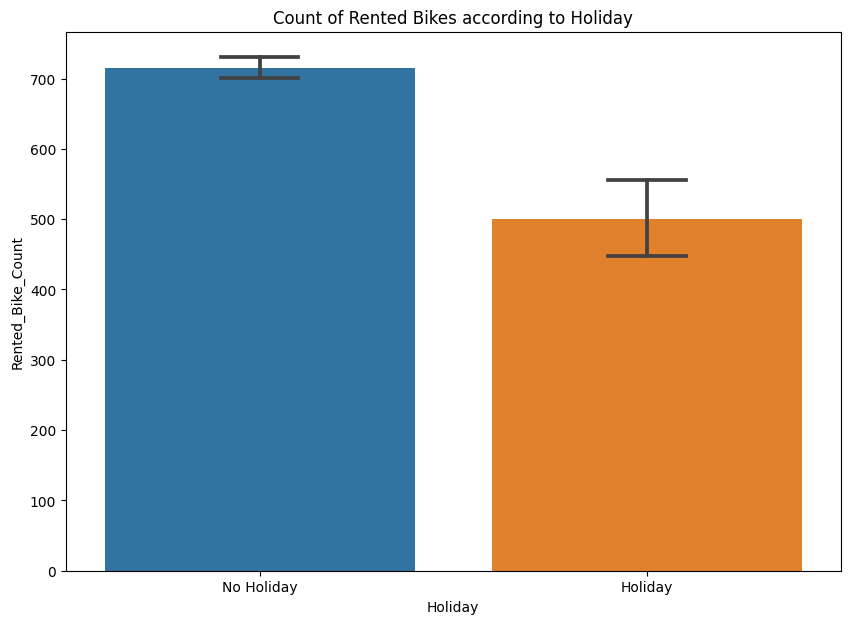

In [ ]:
# visualising the data by holiday
fig, ax = plt.subplots(figsize=(10,7))
sns.barplot(data=df, x = 'Holiday', y = 'Rented_Bike_Count',ax = ax, capsize=.2)
ax.set(title='Count of Rented Bikes according to Holiday')

1. Why did you pick the specific chart?

 I used this chart because it helps to compare between different categories.

2. What is/are the insight(s) found from the chart?

 We can see that the bikes are more rented on no holidays comparison of holidays

3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

 As per this chart we can say that the demand for rented bike is high on no holiday but less demand on holiday, company should focus on no holiday so that the business can have more growth and company should also focus on holiday so that it also will help to make profit.

###**Chart-10**

[Text(0.5, 1.0, 'Count of Rented Bikes according to holiday')]

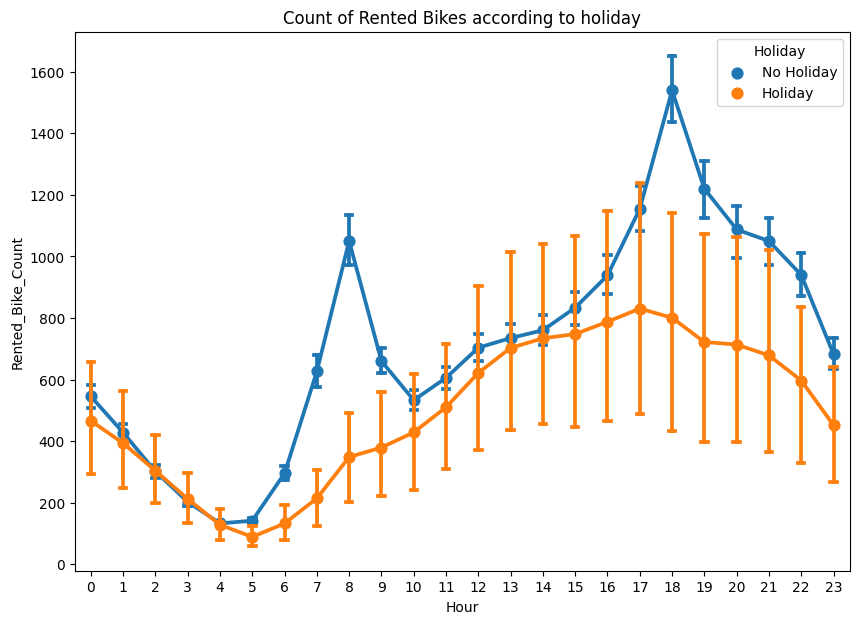

In [ ]:
# visualising the data by holiday
fig, ax = plt.subplots(figsize=(10,7))
sns.pointplot(data=df, x = 'Hour', y = 'Rented_Bike_Count',hue='Holiday', ax = ax, capsize=.2)
ax.set(title='Count of Rented Bikes according to holiday')

  In the above pointplot  which shows the use of rented bike in a holiday and it shows that the in holiday people uses the rented bike from 2pm to 8pm.

**Analyze of Numeric variables**

What is  Numeric Data


*   Numeric data is data type  expressed in numbers, rather then language description. Sometimes called quantitative data, numerical data is always collected in number form. Nummerical data differentiates itself from other number form data types with its ability to carry out arithmetic operations with these numbers.



In [ ]:
# seprate numerical features from the dataframe
numeric_features = df.select_dtypes(exclude=['object','category'])
numeric_features

,Rented_Bike_Count,Temperature,Humidity,Wind_speed,Visibility,Dew_point_temperature,Solar_Radiation,Rainfall,Snowfall
0,254,-5.20,37,2.20,2000,-17.60,0.00,0.00,0.00
1,204,-5.50,38,0.80,2000,-17.60,0.00,0.00,0.00
2,173,-6.00,39,1.00,2000,-17.70,0.00,0.00,0.00
3,107,-6.20,40,0.90,2000,-17.60,0.00,0.00,0.00
4,78,-6.00,36,2.30,2000,-18.60,0.00,0.00,0.00
...,...,...,...,...,...,...,...,...,...
8755,1003,4.20,34,2.60,1894,-10.30,0.00,0.00,0.00
8756,764,3.40,37,2.30,2000,-9.90,0.00,0.00,0.00
8757,694,2.60,39,0.30,1968,-9.90,0.00,0.00,0.00
8758,712,2.10,41,1.00,1859,-9.80,0.00,0.00,0.00


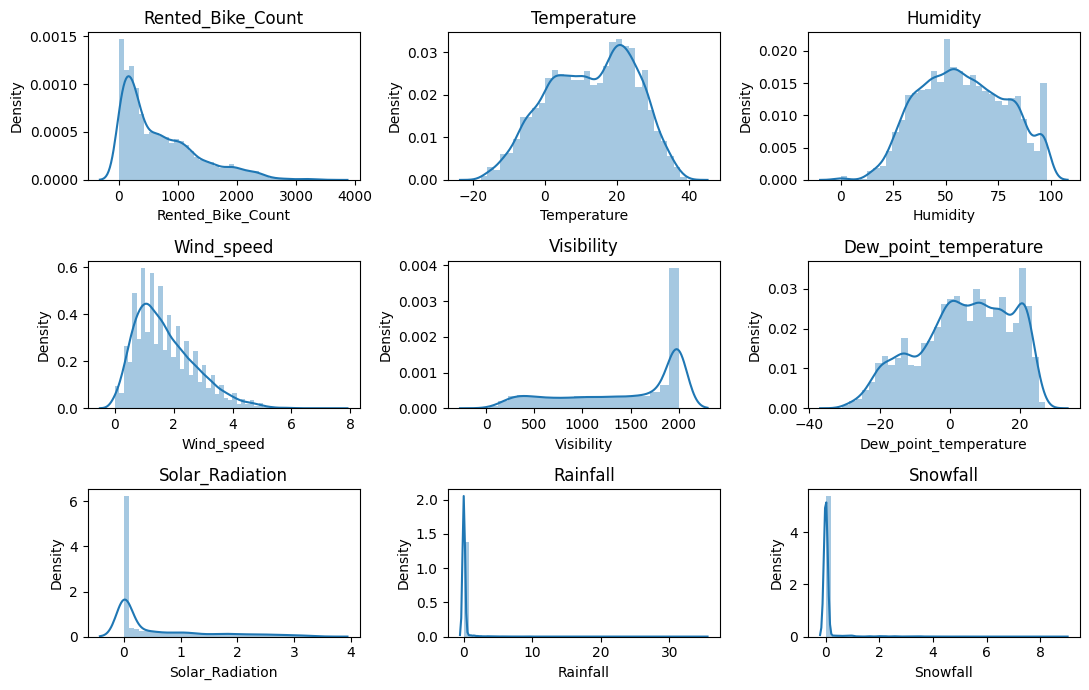

In [ ]:
# printing displots to analyze the distribution of all numeric features
n=1
plt.figure(figsize=(11,7))
for i in numeric_features.columns:
  plt.subplot(3,3,n)
  n=n+1
  sns.distplot(df[i])
  plt.title(i)
  plt.tight_layout()

**Right skewed columns are:-**

Rented Bike Count(its also our dependent variable),Wind speed(m/s), Solar Radiation(MJ/m2),Rainfall(mm), Snowfall(cm)

**Left skewed columns are:-**

Visibility(10m),Dew point temperature(°C)

Now we try to find out that how is the relation of numerical features with our dependent variable

Numerical VS Rented Bike Count

<Axes: xlabel='Temperature'>

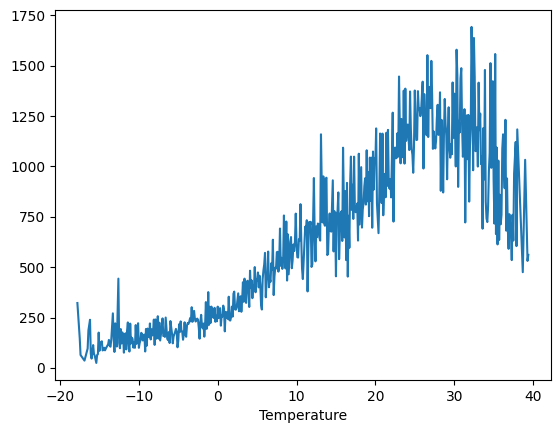

In [ ]:
# Print the plot to analyze the relationship between 'Rented_bike_count' and 'temperature'
df_temp = df.groupby('Temperature').mean()['Rented_Bike_Count']
df_temp.plot()

In this chart we can see that the people like to ride bikes when itis pretty hot around 25°C in average.

<Axes: xlabel='Dew_point_temperature'>

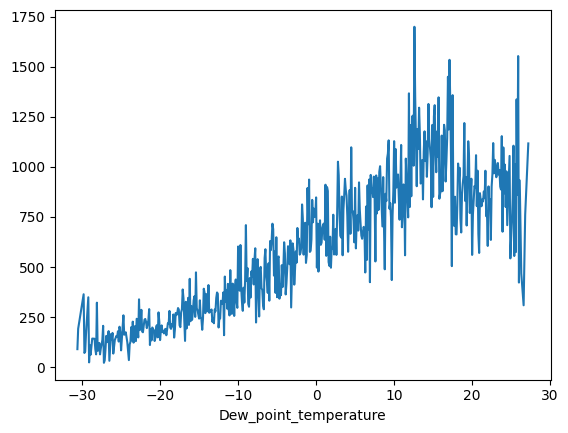

In [ ]:
# Print the plot to analyze the relationship between 'Rented_bike_count' and 'Dew_point_temperature'
df_dew_point = df.groupby('Dew_point_temperature').mean()['Rented_Bike_Count']
df_dew_point.plot()

<Axes: xlabel='Solar_Radiation'>

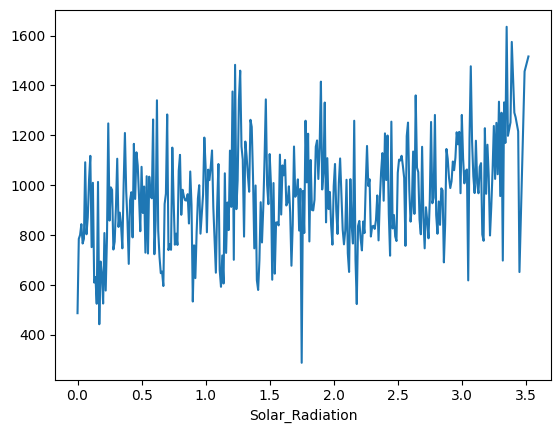

In [ ]:
# Print the plot to analyze the relationship between 'Rented_bike_count' and 'Solar_radiation'
df_solar = df.groupby('Solar_Radiation').mean()['Rented_Bike_Count']
df_solar.plot()

In this chart we can see that the amount of rented bikes are huge, when there is a solar rediation, the count of rents are around 1000.

<Axes: xlabel='Snowfall'>

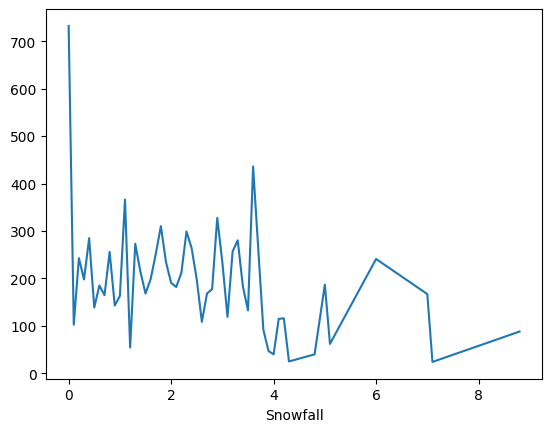

In [ ]:
# Print the plot to analyze the relationship between 'Rented_bike_count' and 'Snowfall'
df_snowfall = df.groupby('Snowfall').mean()['Rented_Bike_Count']
df_snowfall.plot()

As per this plot, On the y-axis the amount of rented bikes are very low, When we have more than 4 cm of snow, the bike rents are moch lower.

<Axes: xlabel='Rainfall'>

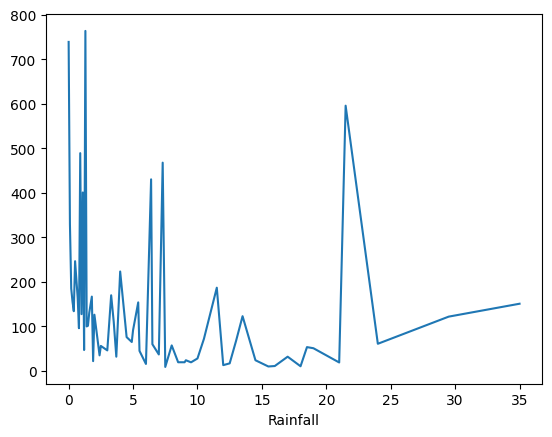

In [ ]:
# Print the plot to analyze the relationship between 'Rented_bike_count' and 'Rainfall'
df_rainfall = df.groupby('Rainfall').mean()['Rented_Bike_Count']
df_rainfall.plot()

We can see that, even if it rains a lot the demand of rent bikes are not decresing, for an example even if we have 20mm of rain there is a big peak of rented bikes.

<Axes: xlabel='Wind_speed'>

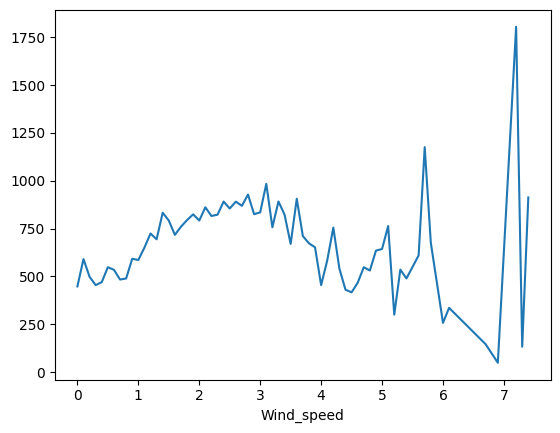

In [ ]:

# Print the plot to analyze the relationship between 'Rented_bike_count' and 'wind_speed'
df_wind = df.groupby('Wind_speed').mean()['Rented_Bike_Count']
df_wind.plot()

We can see that the the demand of rented bikes are increasing when wind speed is around 7 m/s it means that people love to ride when it is little wind.

**REGRESSION PLOT**

Regression creates a best fit line between dependent and independent variable and helps to visualize their linear relationship.

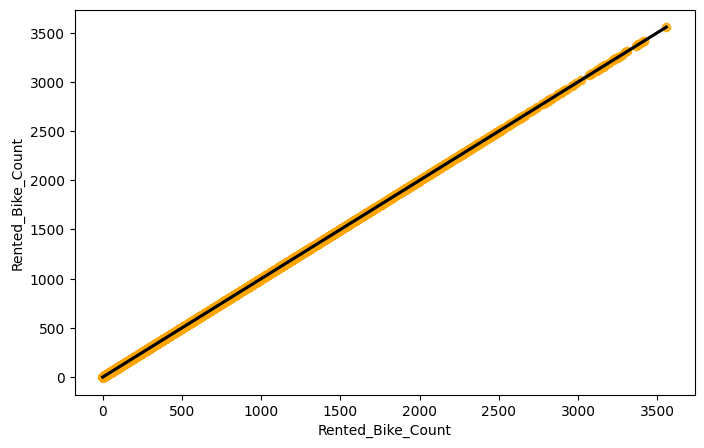

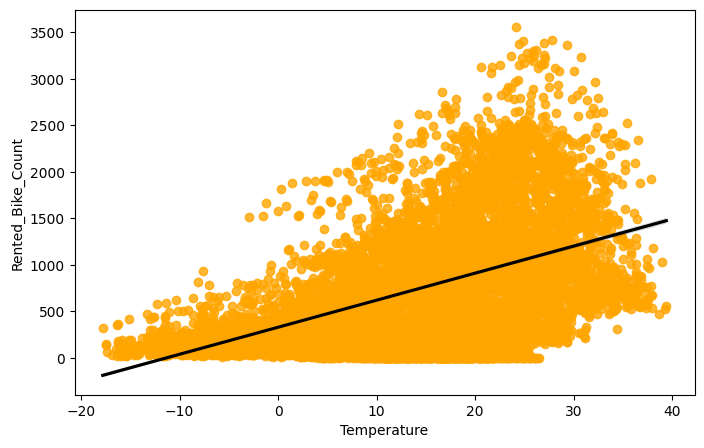

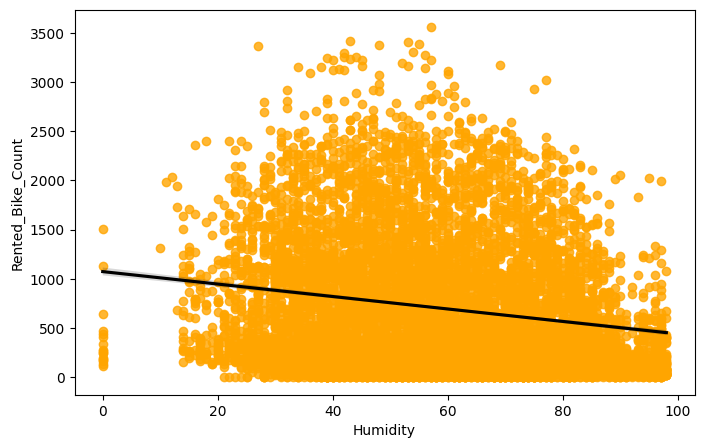

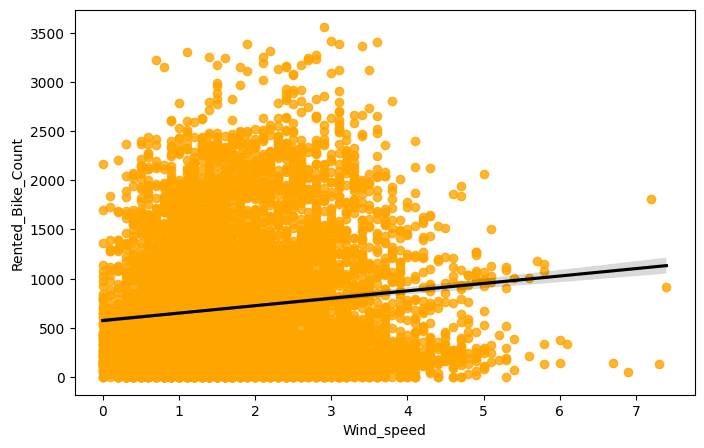

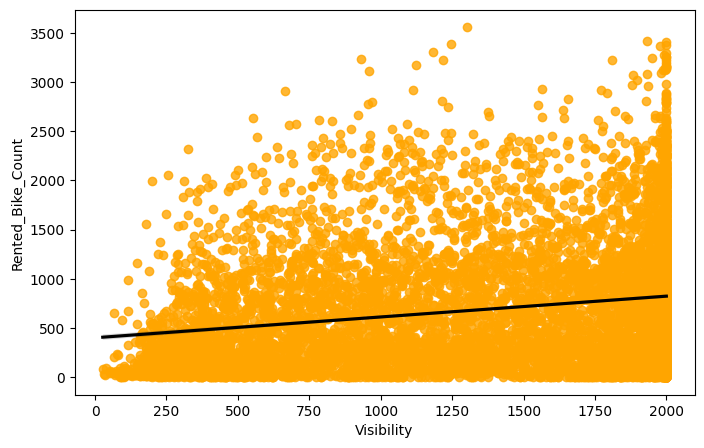

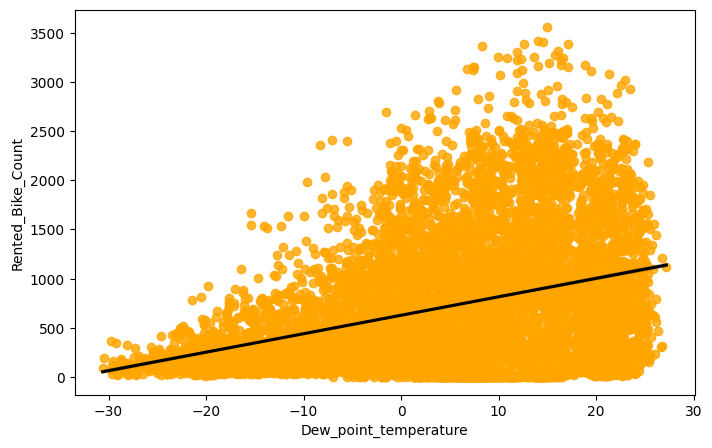

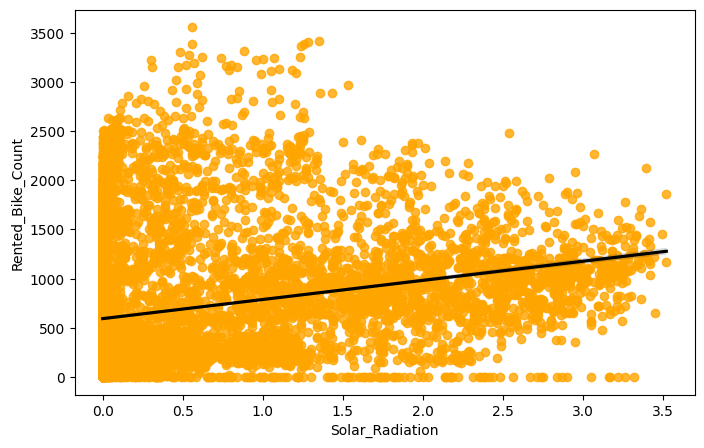

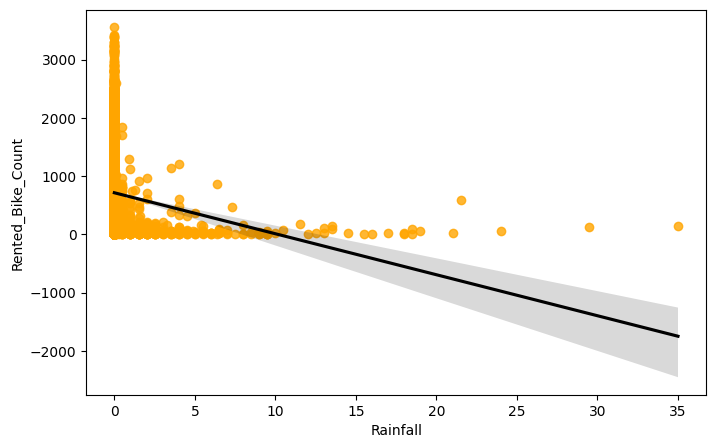

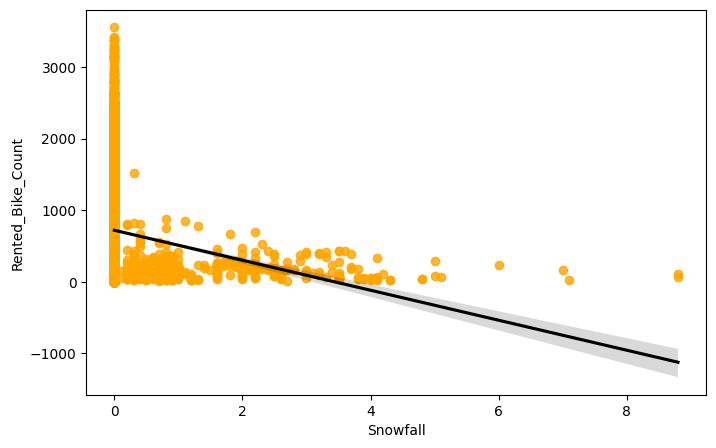

In [ ]:
# Print the regression plot for all the numeric features
for col in numeric_features:
  fig,ax=plt.subplots(figsize=(8,5))
  sns.regplot(x=df[col],y=df['Rented_Bike_Count'],scatter_kws={'color':'orange'},line_kws={'color':'black'})

1. Why did you pick the specific chart?

 regplot is best when we need to vizualize relationship between two variable.

2. What is/are the insight(s) found from the chart?

* Snowfall,Rainfall and Humidity show negative linear relation with rented bike count.

* Bike demand is more when there is low solar radiaiton.

* When there is high visibility, demand is more.

* Dew point shows increase in demand when they are present in moderate amount.

* Less windspeed is prefered for maximum demand.

* Average temperature of 20-35 show maximum demand.

3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

 Environmental factors play an important role as the business solely depends upon them for its operations and success.However we can not control these natural environment, therefore based on the demand and how it alter it, company should be alert with weather forecasting to arrange suitable demand based on daily weather.

**Graph to analyse distribution of Rented_Bike_Count**

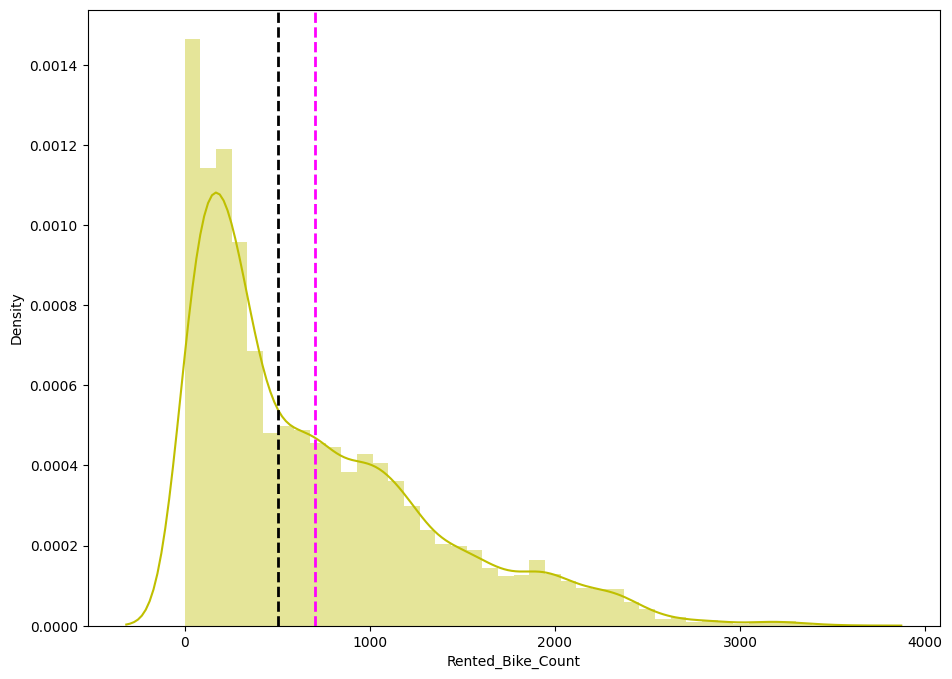

In [ ]:
# Distribution plot of Rented_Bike_Count
plt.figure(figsize = (11,8))
plt.xlabel('Rented_Bike_Count')
plt.ylabel('Density')
ax=sns.distplot(df['Rented_Bike_Count'],hist=True,color='y')
ax.axvline(df['Rented_Bike_Count'].mean(),color='magenta',linestyle='dashed',linewidth=2)
ax.axvline(df['Rented_Bike_Count'].median(),color='black',linestyle='dashed',linewidth=2)
plt.show()

In this graph we can see that the Rented Bike Count has moderate right skewness,Since the assumption of linear regression is that the distribution of dependent variable has to be normal, So we should perform some operation to make it normal.

**Finding Outliers and Treatment**

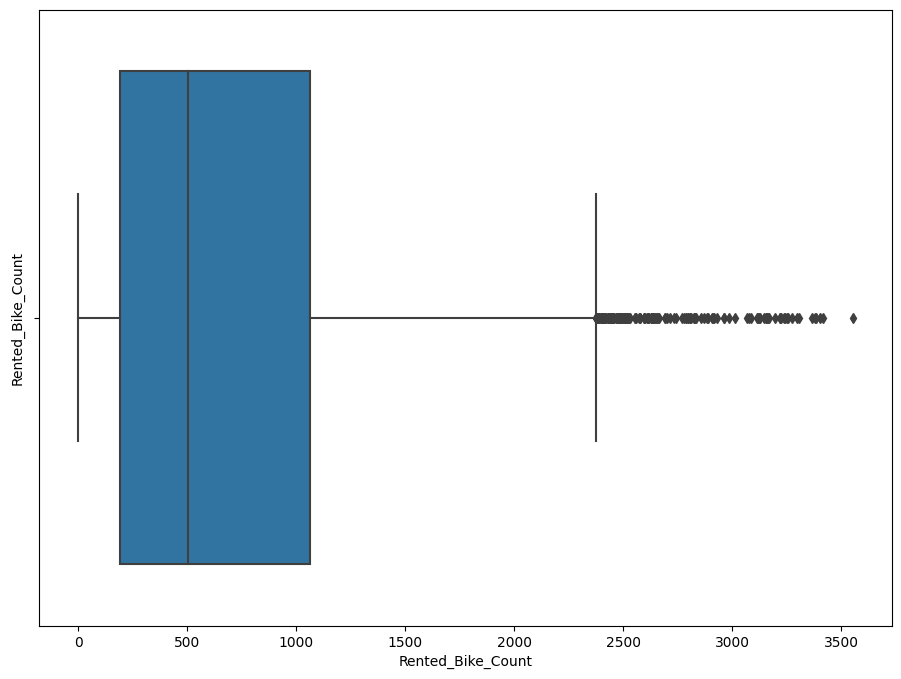

In [ ]:
# Boxplot for Rented Bike Count to check outliers
plt.figure(figsize=(11,8))
plt.ylabel('Rented_Bike_Count')
sns.boxplot(x=df['Rented_Bike_Count'])
plt.show()

In [ ]:
# Outliers treatment
df.loc[df['Rainfall']>=4, 'Rainfall']= 4
df.loc[df['Solar_Radiation']>=2.5,'Solar_Radiation']= 2.5
df.loc[df['Snowfall']>2, 'Snowfall']= 2
df.loc[df['Wind_speed']>=4, 'Wind_speed']= 4

we have applied outlier treatment techniques to the dateset by replacing the outliers with the maximum values.

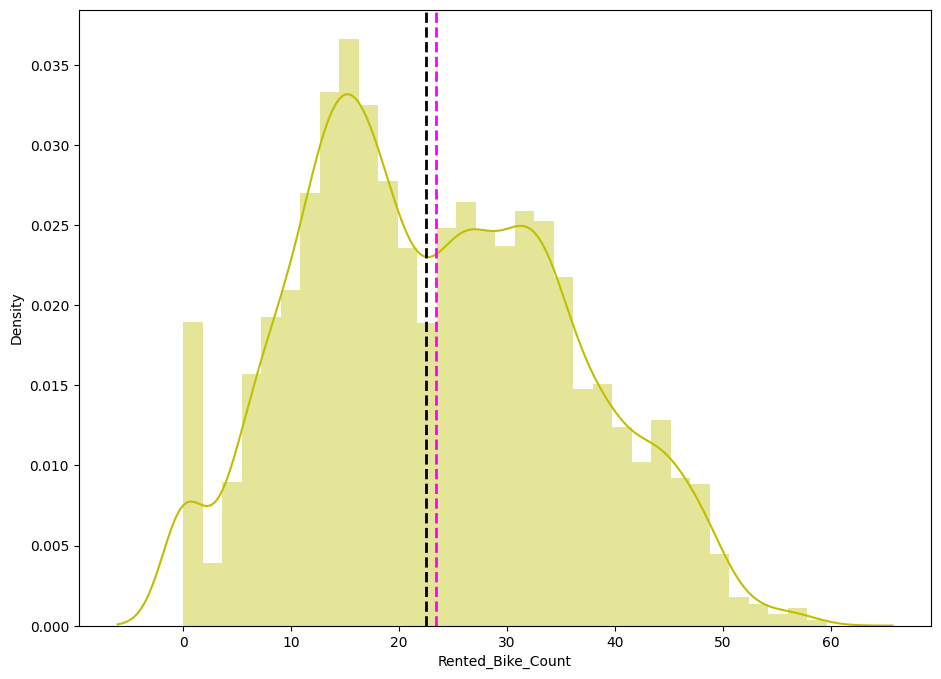

In [ ]:
# Applying square root to rented bike count to improve skewness
plt.figure(figsize = (11,8))
plt.xlabel('Rented_Bike_Count')
plt.ylabel('Density')
ax=sns.distplot(np.sqrt(df['Rented_Bike_Count']),color='y')
ax.axvline(np.sqrt(df['Rented_Bike_Count']).mean(),color='magenta',linestyle='dashed',linewidth=2)
ax.axvline(np.sqrt(df['Rented_Bike_Count']).median(),color='black',linestyle='dashed',linewidth=2)
plt.show()

Applying Square root for the skewed variable in order to make it normal. After applying square root to the skewed Rented Bike Count here we get almost normal distribution.

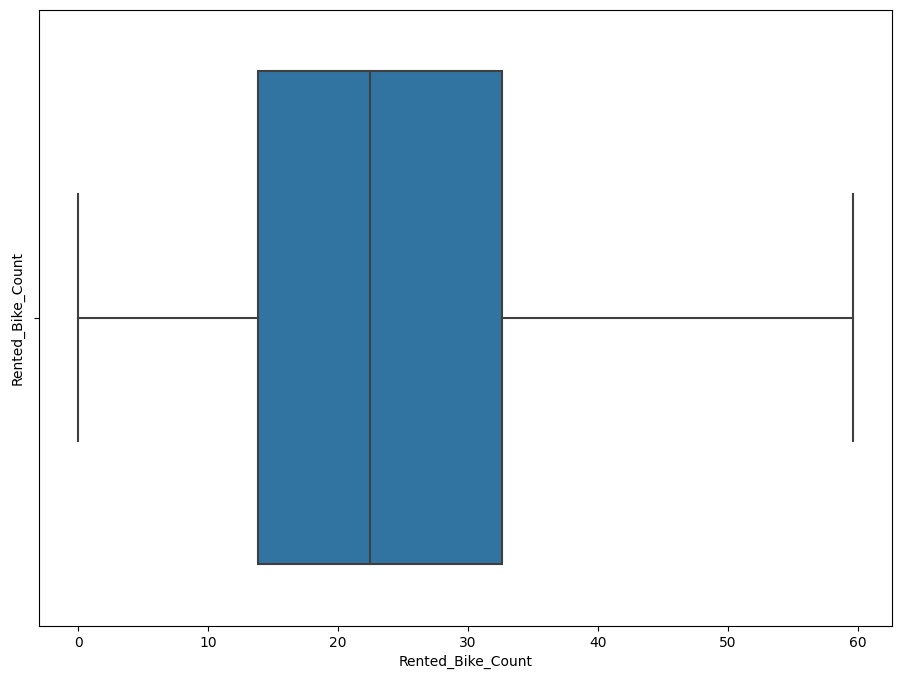

In [ ]:

# After applying sqrt on Rented Bike Count to check do we still have outliers
plt.figure(figsize=(11,8))
plt.ylabel('Rented_Bike_Count')
sns.boxplot(x=np.sqrt(df['Rented_Bike_Count']))
plt.show()

Now we can see that after applying square root to the Rented Bike Count, we find out that there is no outliers.

In [ ]:
df.corr()

,Rented_Bike_Count,Temperature,Humidity,Wind_speed,Visibility,Dew_point_temperature,Solar_Radiation,Rainfall,Snowfall
Rented_Bike_Count,1.00,0.54,-0.20,0.13,0.20,0.38,0.27,-0.17,-0.16
Temperature,0.54,1.00,0.16,-0.03,0.03,0.91,0.35,0.06,-0.26
Humidity,-0.20,0.16,1.00,-0.34,-0.54,0.54,-0.47,0.33,0.09
Wind_speed,0.13,-0.03,-0.34,1.00,0.17,-0.17,0.34,-0.04,0.01
Visibility,0.20,0.03,-0.54,0.17,1.00,-0.18,0.15,-0.24,-0.11
Dew_point_temperature,0.38,0.91,0.54,-0.17,-0.18,1.00,0.09,0.17,-0.20
Solar_Radiation,0.27,0.35,-0.47,0.34,0.15,0.09,1.00,-0.11,-0.08
Rainfall,-0.17,0.06,0.33,-0.04,-0.24,0.17,-0.11,1.00,-0.00
Snowfall,-0.16,-0.26,0.09,0.01,-0.11,-0.20,-0.08,-0.00,1.00


**Checking correlation between variables**

**Checking in OLS Model**

Ordinary least squares(OLS) regression is a statistical method of analysis that estimates the relationship between one or more independent variables and a dependent variable

In [ ]:
# Importing the module
# assigning the 'x' and 'y' value
import statsmodels.api as sm
X = df[['Temperature', 'Humidity',
       'Wind_speed', 'Visibility', 'Dew_point_temperature',
       'Solar_Radiation', 'Rainfall', 'Snowfall']]
Y = df['Rented_Bike_Count']
df.head()

,Rented_Bike_Count,Hour,Temperature,Humidity,Wind_speed,Visibility,Dew_point_temperature,Solar_Radiation,Rainfall,Snowfall,Seasons,Holiday,Functioning_Day,month,weekdays_weekend
0,254,0,-5.20,37,2.20,2000,-17.60,0.00,0.00,0.00,Winter,No Holiday,Yes,12,0
1,204,1,-5.50,38,0.80,2000,-17.60,0.00,0.00,0.00,Winter,No Holiday,Yes,12,0
2,173,2,-6.00,39,1.00,2000,-17.70,0.00,0.00,0.00,Winter,No Holiday,Yes,12,0
3,107,3,-6.20,40,0.90,2000,-17.60,0.00,0.00,0.00,Winter,No Holiday,Yes,12,0
4,78,4,-6.00,36,2.30,2000,-18.60,0.00,0.00,0.00,Winter,No Holiday,Yes,12,0


In [ ]:
# add a constant column
X = sm.add_constant(X)
X

,const,Temperature,Humidity,Wind_speed,Visibility,Dew_point_temperature,Solar_Radiation,Rainfall,Snowfall
0,1.00,-5.20,37,2.20,2000,-17.60,0.00,0.00,0.00
1,1.00,-5.50,38,0.80,2000,-17.60,0.00,0.00,0.00
2,1.00,-6.00,39,1.00,2000,-17.70,0.00,0.00,0.00
3,1.00,-6.20,40,0.90,2000,-17.60,0.00,0.00,0.00
4,1.00,-6.00,36,2.30,2000,-18.60,0.00,0.00,0.00
...,...,...,...,...,...,...,...,...,...
8755,1.00,4.20,34,2.60,1894,-10.30,0.00,0.00,0.00
8756,1.00,3.40,37,2.30,2000,-9.90,0.00,0.00,0.00
8757,1.00,2.60,39,0.30,1968,-9.90,0.00,0.00,0.00
8758,1.00,2.10,41,1.00,1859,-9.80,0.00,0.00,0.00


In [ ]:
# fit an OLS model
model=sm.OLS(Y, X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      Rented_Bike_Count   R-squared:                       0.405
Model:                            OLS   Adj. R-squared:                  0.404
Method:                 Least Squares   F-statistic:                     744.3
Date:                Wed, 29 Nov 2023   Prob (F-statistic):               0.00
Time:                        04:52:46   Log-Likelihood:                -66827.
No. Observations:                8760   AIC:                         1.337e+05
Df Residuals:                    8751   BIC:                         1.337e+05
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                   699.4173    106.562      6.563      0.000     490.531     908.304
Temperature              40.3283      4.160      9.695      0.000      32.175      48.482
Humidity                 -8.5913      1.193     -7.203      0.000     -10.929      -6.253
Wind_speed               62.4552      5.951     10.495      0.000      50.790      74.121
Visibility               -0.0137      0.011     -1.254      0.210      -0.035       0.008
Dew_point_temperature    -5.0068      4.394     -1.139      0.255     -13.621       3.607
Solar_Radiation        -124.1270      9.254    -13.413      0.000    -142.267    -105.987
Rainfall               -162.0914     11.237    -14.425      0.000    -184.118    -140.065
Snowfall                 53.2592     19.061      2.794      0.005      15.895      90.623
==============================================================================
Omnibus:                      965.203   Durbin-Watson:                   0.344
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1618.702
Skew:                           0.770   Prob(JB):                         0.00
Kurtosis:                       4.436   Cond. No.                     3.13e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.13e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""



*   R square and Adj square are near to each other. 40% of variance in the Rented Bike Count is explained by the model.
* For F statistic, p value is less than 0.05 for 5% level of significance.
* P value of dew point temp and visibility are very high and they are not significant.
* Omnibus tests the skewness and kurtosis of the residuals. Here the value of omnibus is high, it shows we have skewness is our data.
* The condition number is large,3.11e+04. This might indicate that there are strong multicollinearity or other numerical problems.
* Durbin-Watson tests for autocorrelation of the residuals. Here value is less than 0.5. We can say that there exists a positive auto correlation among the variables.



In [ ]:
X.corr()

,const,Temperature,Humidity,Wind_speed,Visibility,Dew_point_temperature,Solar_Radiation,Rainfall,Snowfall
const,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Temperature,NaN,1.00,0.16,-0.03,0.03,0.91,0.35,0.06,-0.26
Humidity,NaN,0.16,1.00,-0.34,-0.54,0.54,-0.47,0.33,0.09
Wind_speed,NaN,-0.03,-0.34,1.00,0.17,-0.17,0.34,-0.04,0.01
Visibility,NaN,0.03,-0.54,0.17,1.00,-0.18,0.15,-0.24,-0.11
Dew_point_temperature,NaN,0.91,0.54,-0.17,-0.18,1.00,0.09,0.17,-0.20
Solar_Radiation,NaN,0.35,-0.47,0.34,0.15,0.09,1.00,-0.11,-0.08
Rainfall,NaN,0.06,0.33,-0.04,-0.24,0.17,-0.11,1.00,-0.00
Snowfall,NaN,-0.26,0.09,0.01,-0.11,-0.20,-0.08,-0.00,1.00




*  From the OLS model we find that the 'Temperature and Dew_point_temperature' are highly correlated so we need to drop one of them.
* For droping them we check the (P>|t|) value from above table and we can see that the 'Dew_point_temperature' value us higher so need to deop Dew_point_temperatrue column.
* For clarity, we use visualisation heatmap in next step.


**Correlation Heatmap**

A correlation matrix is a table showing correlation coefficients between variables. Each cell in the table shows the correlation between two variables. A correlation matrix is used to summarize data, as an input into a more advanced analysis, and as a diagnostic for advanced analyses. The range of correlation is [-1,1].

<Axes: >

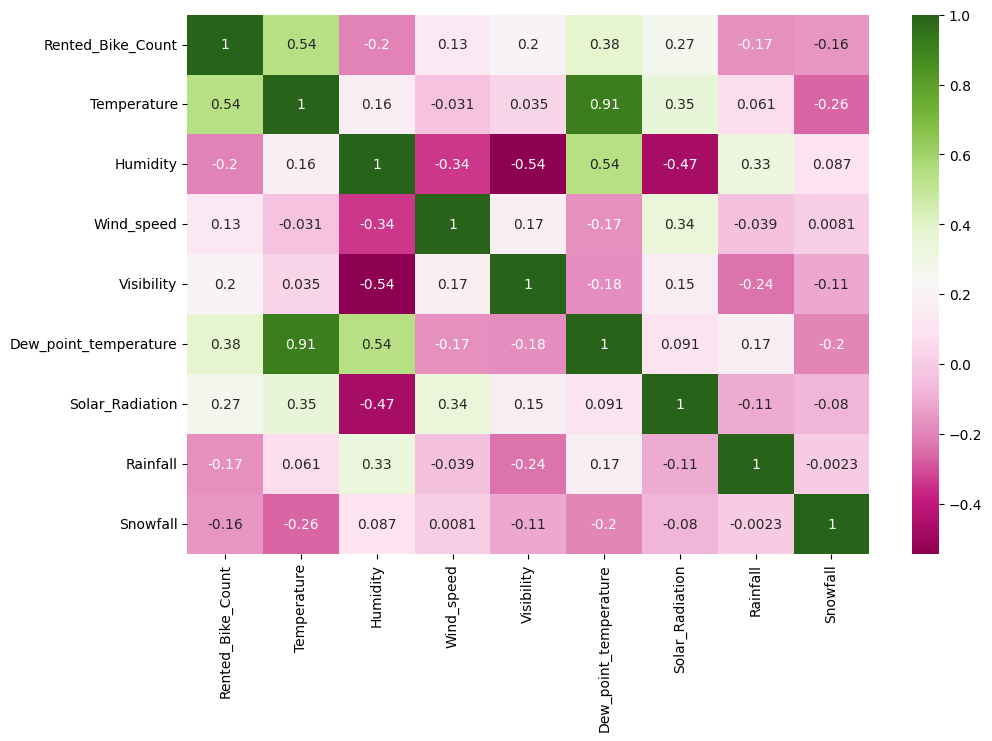

In [ ]:
# Checking correlation of using heatmap
plt.figure(figsize=(11,7))
sns.heatmap(df.corr(),cmap='PiYG',annot=True)

1. Why did you pick the specific chart?

 A correlation matrix is a table showing correlation coefficients between variables. Each cell in the table shows the correlation between two variables. A correlation matrix is used to summarize data, as an input into a more advanced analysis, and as a diagnostic for advanced analyses. The range of correlation is [-1,1].


2. What is/are the insight(s) found from the chart?

 * Features like Temperature,Dew point temperature and solar radiation  show the most positive correlation.
 * humidity and rainfall show the most negative correlation.

In this above chart we can see that there is a positive correlation between 'Temperature' and 'Dew point temperature' 0.91, so even if we drop this column then it will not affect the outcome of our analysis. And they have the same variation, so we can drop the column 'Dew point temperature'.

In [ ]:
# Drop the dew point temperature column
df = df.drop(['Dew_point_temperature'],axis=1)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   Rented_Bike_Count  8760 non-null   int64   
 1   Hour               8760 non-null   category
 2   Temperature        8760 non-null   float64 
 3   Humidity           8760 non-null   int64   
 4   Wind_speed         8760 non-null   float64 
 5   Visibility         8760 non-null   int64   
 6   Solar_Radiation    8760 non-null   float64 
 7   Rainfall           8760 non-null   float64 
 8   Snowfall           8760 non-null   float64 
 9   Seasons            8760 non-null   object  
 10  Holiday            8760 non-null   object  
 11  Functioning_Day    8760 non-null   object  
 12  month              8760 non-null   category
 13  weekdays_weekend   8760 non-null   category
dtypes: category(3), float64(5), int64(3), object(3)
memory usage: 779.8+ KB


**Feature Engineering & Data Pre-processing**

One Hot Encoding

In [ ]:
categorical_features = list(df.select_dtypes(['object','category']).columns)
categorical_features=pd.Index(categorical_features)
categorical_features

Index(['Hour', 'Seasons', 'Holiday', 'Functioning_Day', 'month',
       'weekdays_weekend'],
      dtype='object')

**One Hot Encoding**



A one hot encoding allows the representation of categorical data to be more expressive. Many machine learning algorithms cannot work with categorical data directly. The categories must be converted into numbers. This is required for both input and output variables that are categorical.

In [ ]:
# create a copy
dff = df

def one_hot_encoding(data, column):
  data = pd.concat([data,pd.get_dummies(data[column],prefix=column, drop_first=True)],axis=1)
  data = data.drop([column],axis=1)
  return data

for col in categorical_features:
  dff = one_hot_encoding(dff, col)
dff.head()

,Rented_Bike_Count,Temperature,Humidity,Wind_speed,Visibility,Solar_Radiation,Rainfall,Snowfall,Hour_1,Hour_2,...,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12,weekdays_weekend_1
0,254,-5.20,37,2.20,2000,0.00,0.00,0.00,0,0,...,0,0,0,0,0,0,0,0,1,0
1,204,-5.50,38,0.80,2000,0.00,0.00,0.00,1,0,...,0,0,0,0,0,0,0,0,1,0
2,173,-6.00,39,1.00,2000,0.00,0.00,0.00,0,1,...,0,0,0,0,0,0,0,0,1,0
3,107,-6.20,40,0.90,2000,0.00,0.00,0.00,0,0,...,0,0,0,0,0,0,0,0,1,0
4,78,-6.00,36,2.30,2000,0.00,0.00,0.00,0,0,...,0,0,0,0,0,0,0,0,1,0


**Model Training**

**Train test split for regression**

Before fitting any model it is a thumb rule to split the dataset into training and testing set. This means that some proportion of dataset will go in training the model and some proportion will be used that how the model is permofming. The proportion can be any ratio 80:20, 70:30, 75:25 actually it depends on the person. But mostly used 80:20 ratio for training and testing respectively. We will split our data into trainig and testing using scikit learn library.

In [ ]:
# Assigning the value x and y
x = dff.drop(columns=['Rented_Bike_Count'], axis=1)
y = np.sqrt(dff['Rented_Bike_Count'])

In [ ]:
x.head()

,Temperature,Humidity,Wind_speed,Visibility,Solar_Radiation,Rainfall,Snowfall,Hour_1,Hour_2,Hour_3,...,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12,weekdays_weekend_1
0,-5.20,37,2.20,2000,0.00,0.00,0.00,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,-5.50,38,0.80,2000,0.00,0.00,0.00,1,0,0,...,0,0,0,0,0,0,0,0,1,0
2,-6.00,39,1.00,2000,0.00,0.00,0.00,0,1,0,...,0,0,0,0,0,0,0,0,1,0
3,-6.20,40,0.90,2000,0.00,0.00,0.00,0,0,1,...,0,0,0,0,0,0,0,0,1,0
4,-6.00,36,2.30,2000,0.00,0.00,0.00,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [ ]:
y.head()

0   15.94
1   14.28
2   13.15
3   10.34
4    8.83
Name: Rented_Bike_Count, dtype: float64

In [ ]:
# Creating the training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.25,random_state=0)
print(X_train.shape)
print(X_test.shape)

(6570, 47)
(2190, 47)


In [ ]:
dff.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 48 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Rented_Bike_Count    8760 non-null   int64  
 1   Temperature          8760 non-null   float64
 2   Humidity             8760 non-null   int64  
 3   Wind_speed           8760 non-null   float64
 4   Visibility           8760 non-null   int64  
 5   Solar_Radiation      8760 non-null   float64
 6   Rainfall             8760 non-null   float64
 7   Snowfall             8760 non-null   float64
 8   Hour_1               8760 non-null   uint8  
 9   Hour_2               8760 non-null   uint8  
 10  Hour_3               8760 non-null   uint8  
 11  Hour_4               8760 non-null   uint8  
 12  Hour_5               8760 non-null   uint8  
 13  Hour_6               8760 non-null   uint8  
 14  Hour_7               8760 non-null   uint8  
 15  Hour_8               8760 non-null   u

In [ ]:
dff.describe().columns

Index(['Rented_Bike_Count', 'Temperature', 'Humidity', 'Wind_speed',
       'Visibility', 'Solar_Radiation', 'Rainfall', 'Snowfall', 'Hour_1',
       'Hour_2', 'Hour_3', 'Hour_4', 'Hour_5', 'Hour_6', 'Hour_7', 'Hour_8',
       'Hour_9', 'Hour_10', 'Hour_11', 'Hour_12', 'Hour_13', 'Hour_14',
       'Hour_15', 'Hour_16', 'Hour_17', 'Hour_18', 'Hour_19', 'Hour_20',
       'Hour_21', 'Hour_22', 'Hour_23', 'Seasons_Spring', 'Seasons_Summer',
       'Seasons_Winter', 'Holiday_No Holiday', 'Functioning_Day_Yes',
       'month_2', 'month_3', 'month_4', 'month_5', 'month_6', 'month_7',
       'month_8', 'month_9', 'month_10', 'month_11', 'month_12',
       'weekdays_weekend_1'],
      dtype='object')

Let's now implement our first model LinearRegression using scikit learn library.

In [ ]:
# Now we are using linear regression model
lr = LinearRegression()
lr.fit(X_train, y_train)

# Let's check the score
lr.score(X_train, y_train)


0.791252853377143

In [ ]:
# Let's check the coffecient
lr.coef_

array([ 4.68899686e-01, -1.02733686e-01,  1.83389932e-02,  6.99377347e-04,
        9.18648101e-01, -5.11433440e+00, -2.17361057e-01, -2.18196972e+00,
       -5.03358899e+00, -7.07227656e+00, -9.68767884e+00, -9.28180883e+00,
       -4.17525131e+00,  1.98924368e+00,  7.41923561e+00,  1.62031037e+00,
       -3.02792590e+00, -3.03027527e+00, -1.90798462e+00, -2.28030752e+00,
       -2.40532863e+00, -1.09497887e+00,  7.19611360e-01,  4.50143285e+00,
        1.07240063e+01,  7.21392625e+00,  6.19079708e+00,  6.27641939e+00,
        5.13030344e+00,  1.46615648e+00, -9.03397290e+07,  4.78702031e+07,
       -7.87118106e+07,  3.41060308e+00,  2.83867043e+01, -6.19500042e-01,
        1.16279214e+07,  1.16279231e+07,  1.16279256e+07, -1.26582005e+08,
       -1.26582011e+08, -1.26582013e+08, -7.87118041e+07, -7.87118016e+07,
       -7.87118030e+07,  2.04432372e+00, -1.36518278e+00])

In [ ]:
# Let's check the value of X_train and X_test
y_pred_train = lr.predict(X_train)
y_pred_test = lr.predict(X_test)
print(y_pred_train)
print(y_pred_test)

[20.62664874 30.79738367 19.93336643 ... 34.4050003  23.2814282
 22.23204722]
[17.10152079 23.09766774 20.39455275 ... 40.50588162  1.56393892
 31.35417917]


In [ ]:
# let's calculate the MSE
mse_lr = mse(y_train, y_pred_train)
print('MSE:',mse_lr)

# calculate the RMSE
rmse_lr = np.sqrt(mse_lr)
print('RMSE:',rmse_lr)

# calculate mae
mae_lr = mae(y_train, y_pred_train)
print('MAE:',mae_lr)

# calculate the r2 and adjusted r2_score
r2_lr = r2(y_train, y_pred_train)
print('R2:',r2_lr)
Adjusted_R2_lr = (1-(1-r2(y_train, y_pred_train))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))
print('Adjusted R2:',Adjusted_R2_lr)

MSE: 32.145114805768415
RMSE: 5.669666198795871
MAE: 4.30109837175655
R2: 0.791252853377143
Adjusted R2: 0.7866725004867255


We can see train set's r2 score value is 0.79 that means our model is able to capture most of the data variance. Lets save it in a dataframe for later comparison.

In [ ]:
# storing the value in a dataframe for later comparison
dict_1 = {'Model':'Linear Regression',
          'MSE':round((mse_lr),3),
          'RMSE':round((rmse_lr),3),
          'MAE':round((mae_lr),3),
          'R2_score':round((r2_lr),3),
          'Adjusted_R2':round((Adjusted_R2_lr),2),
          }
training_df=pd.DataFrame(dict_1, index=[1])

In [ ]:
training_df

,Model,MSE,RMSE,MAE,R2_score,Adjusted_R2
1,Linear Regression,32.15,5.67,4.30,0.79,0.79


In [ ]:
# let's calculate the MSE
mse_lr = mse(y_test, y_pred_test)
print('MSE:',mse_lr)

# calculate the RMSE
rmse_lr = np.sqrt(mse_lr)
print('RMSE:',rmse_lr)

# calculate mae
mae_lr = mae(y_test, y_pred_test)
print('MAE:',mae_lr)

# calculate the r2 and adjusted r2_score
r2_lr = r2(y_test, y_pred_test)
print('R2:',r2_lr)
Adjusted_R2_lr = (1-(1-r2(y_test, y_pred_test))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))
print('Adjusted R2:',Adjusted_R2_lr)

MSE: 31.21751120108675
RMSE: 5.587263301571419
MAE: 4.260531657874549
R2: 0.8023787935913236
Adjusted R2: 0.7980425673069129


We can see test set's r2 score value is 0.80 that means our model is performing very well on data. Lets try to visualize our residuals and see if there is heteroscedasticity.

In [ ]:
# storing the value in a dataframe for later comparison
dict_2 = {'Model':'Linear Regression',
          'MSE':round((mse_lr),3),
          'RMSE':round((rmse_lr),3),
          'MAE':round((mae_lr),3),
          'R2_score':round((r2_lr),3),
          'Adjusted_R2':round((Adjusted_R2_lr),2),
          }
testing_df=pd.DataFrame(dict_2, index=[1])

In [ ]:
testing_df

,Model,MSE,RMSE,MAE,R2_score,Adjusted_R2
1,Linear Regression,31.22,5.59,4.26,0.80,0.80


In [ ]:
# displaying the results of eveluation metric values for Linear Regression with training and testing
result = pd.concat([training_df, testing_df], keys=['Training set','Testing set'])
result

,,Model,MSE,RMSE,MAE,R2_score,Adjusted_R2
Training set,1,Linear Regression,32.15,5.67,4.30,0.79,0.79
Testing set,1,Linear Regression,31.22,5.59,4.26,0.80,0.80


**Heteroscedasticity**

Heteroscedasticity produces a distinctive fan or cone shape in residual plots. To check for heteroscedasticity, you need to assess the residuals by fitted value plots specifically. Typically, the telltale pattern for heteroscedasticity is that as the fitted values increases, the variance of the residuals also increases.

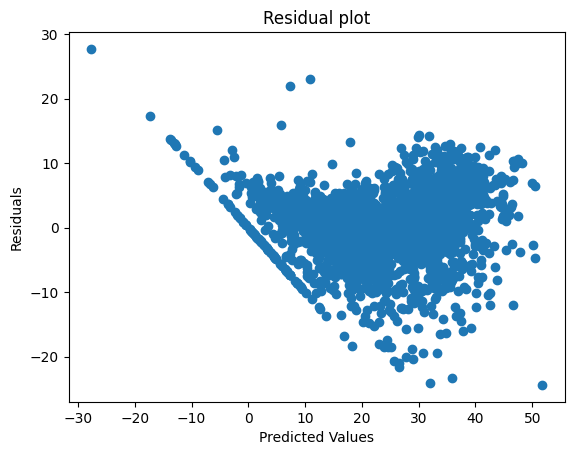

In [ ]:
#Heteroscedasticity - Residual plot
plt.scatter((y_pred_test),(y_test)-(y_pred_test))
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual plot')
plt.show()

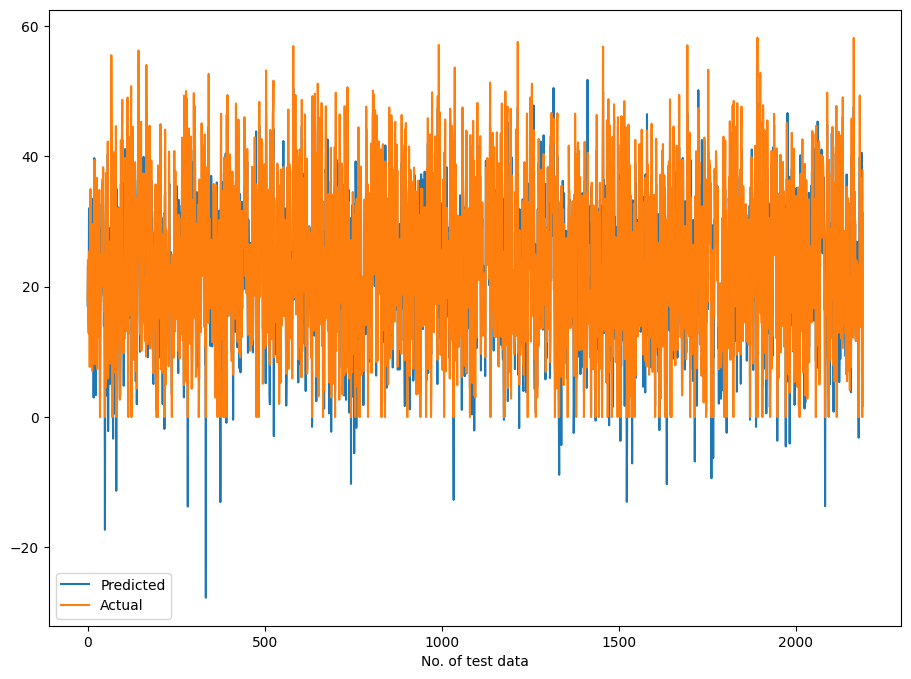

In [ ]:
# Actual price vs predicted price for linear regression plot
plt.figure(figsize=(11,8))
plt.plot(y_pred_test)
plt.plot(np.array(y_test))
plt.legend(['Predicted','Actual'])
plt.xlabel('No. of test data')
plt.show()

**Ridge and Lasso Regression**


*   Ridge and Lasso regression are types of regularization techniques.
*   Regularization techniques are used to deal with overfitting and when the dataset is large.
* Ridge and Lasso regression involes adding penalties to the regression function.



**RIDGE REGRESSION**

Ridge regression is a method of estimating the coefficients of regression models in scenarios where the independent variables are highly correlated. It uses the linear regression model with L2 regularization method.

In [ ]:
# import the package
from sklearn.linear_model import Ridge

ridge = Ridge(alpha=0.1)

# Fit the model
ridge.fit(X_train, y_train)

Ridge(alpha=0.1)

In [ ]:
# check the score
ridge.score(X_train, y_train),ridge.score(X_test, y_test )

(0.7912527761772726, 0.8023710592474951)

In [ ]:
# Lets check the X_train value and X_test value
y_pred_train_ridge = ridge.predict(X_train)
y_pred_test_ridge = ridge.predict(X_test)

In [ ]:
y_pred_train_ridge

array([20.62298584, 30.79728204, 19.9313908 , ..., 34.40392233,
       23.28141619, 22.22957588])

In [ ]:
y_pred_test_ridge

array([17.10269158, 23.09797634, 20.39407758, ..., 40.50590122,
        1.57892994, 31.35388445])

In [ ]:
# let's calculate the MSE
mse_ridge = mse(y_train, y_pred_train_ridge)
print('MSE:',mse_ridge)

# calculate the RMSE
rmse_ridge = np.sqrt(mse_ridge)
print('RMSE:',rmse_ridge)

# calculate mae
mae_ridge = mae(y_train, y_pred_train_ridge)
print('MAE:',mae_ridge)

# calculate the r2 and adjusted r2_score
r2_ridge = r2(y_train, y_pred_train_ridge)
print('R2:',r2_ridge)
Adjusted_R2_ridge = (1-(1-r2(y_train, y_pred_train_ridge))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))
print('Adjusted R2:',Adjusted_R2_ridge)

MSE: 32.145126693828864
RMSE: 5.6696672471873395
MAE: 4.301221643579305
R2: 0.7912527761772726
Adjusted R2: 0.786672421592927


We can see train set's r2 score value is 0.79 that means our model is able to capture most of the data variance. Lets save it in a dataframe for later comparison.

In [ ]:
# storing the value in a dataframe for later comparison
dict_1 = {'Model':'Ridge Regression',
          'MSE':round((mse_ridge),3),
          'RMSE':round((rmse_ridge),3),
          'MAE':round((mae_ridge),3),
          'R2_score':round((r2_ridge),3),
          'Adjusted_R2':round((Adjusted_R2_ridge),2),
          }
training_df=pd.DataFrame(dict_1, index=[1])

In [ ]:
training_df

,Model,MSE,RMSE,MAE,R2_score,Adjusted_R2
1,Ridge Regression,32.15,5.67,4.30,0.79,0.79


In [ ]:
# let's calculate the MSE
mse_ridge = mse(y_test, y_pred_test_ridge)
print('MSE:',mse_ridge)

# calculate the RMSE
rmse_ridge = np.sqrt(mse_ridge)
print('RMSE:',rmse_ridge)

# calculate mae
mae_ridge = mae(y_test, y_pred_test_ridge)
print('MAE:',mae_ridge)

# calculate the r2 and adjusted r2_score
r2_ridge = r2(y_test, y_pred_test_ridge)
print('R2:',r2_ridge)
Adjusted_R2_ridge = (1-(1-r2(y_test, y_pred_test_ridge))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))
print('Adjusted R2:',Adjusted_R2_ridge)

MSE: 31.218732967563575
RMSE: 5.587372635466832
MAE: 4.260759424869219
R2: 0.8023710592474951
Adjusted R2: 0.79803466325526


We can see test set's r2 score value is 0.80 that means our model is performing well on the data. Lets try to visualize out residuala and see if there is heteroscedasticity.

In [ ]:
# storing the value in a dataframe for later comparison
dict_2 = {'Model':'Ridge Regression',
          'MSE':round((mse_ridge),3),
          'RMSE':round((rmse_ridge),3),
          'MAE':round((mae_ridge),3),
          'R2_score':round((r2_ridge),3),
          'Adjusted_R2':round((Adjusted_R2_ridge),2),
          }
testing_df=pd.DataFrame(dict_2, index=[1])

In [ ]:
testing_df

,Model,MSE,RMSE,MAE,R2_score,Adjusted_R2
1,Ridge Regression,31.22,5.59,4.26,0.80,0.80


In [ ]:
# displaying the results of eveluation metric values for Ridge regression with training and testing
result = pd.concat([training_df, testing_df], keys=['Training set','Testing set'])
result

,,Model,MSE,RMSE,MAE,R2_score,Adjusted_R2
Training set,1,Ridge Regression,32.15,5.67,4.30,0.79,0.79
Testing set,1,Ridge Regression,31.22,5.59,4.26,0.80,0.80


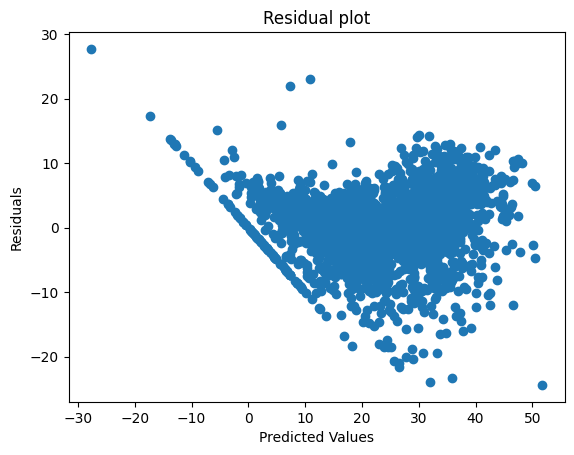

In [ ]:
#Heteroscedasticity - Residual plot
plt.scatter((y_pred_test_ridge),(y_test)-(y_pred_test_ridge))
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual plot')
plt.show()

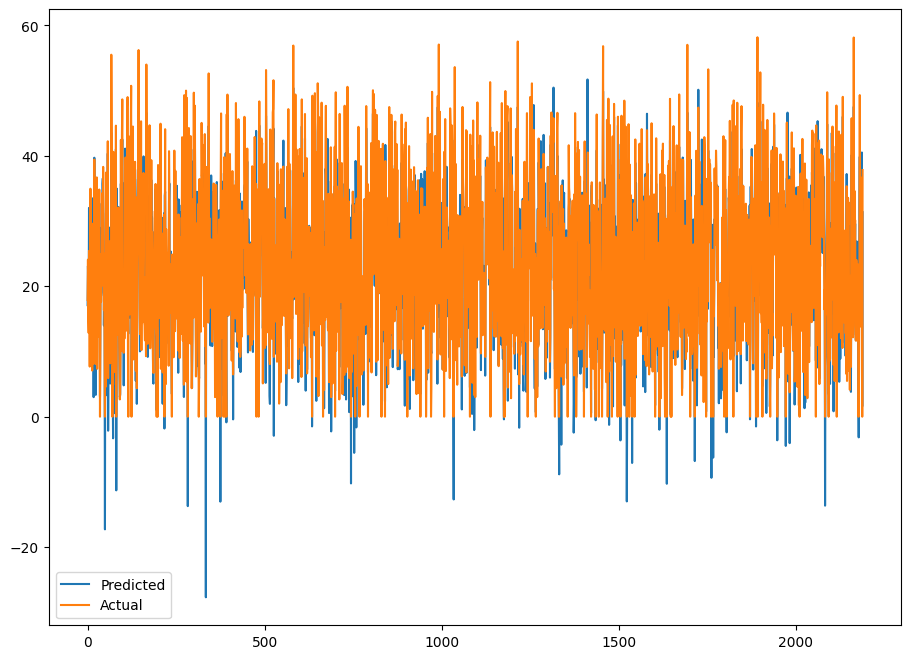

In [ ]:
# Actual price vs predicted price for ridge regression plot
plt.figure(figsize=(11,8))
plt.plot(y_pred_test_ridge)
plt.plot(np.array(y_test))
plt.legend(['Predicted','Actual'])
plt.show()

**Lasso Regression**

Lasso regression analysis is a shrinkage and variable selection method for linear regression model. The goal of lasso regression is to obtain the subsets of predictors that minimize prediction error for a quantative response variable. It uses the linear regression model with L1 regularization.

In [ ]:
from sklearn.linear_model import Lasso

In [ ]:
# Lets create an instance of lasso regression implementation
lasso = Lasso(alpha=1.0, max_iter=3000)
# lets fit the lasso model
lasso.fit(X_train, y_train)

Lasso(max_iter=3000)

In [ ]:
# lets check the score
lasso.score(X_test, y_test),lasso.score(X_train, y_train)

(0.38086483341841226, 0.3983632039954085)

In [ ]:
# Lets check the X_train value and X_test value
y_pred_train_lasso = lasso.predict(X_train)
y_pred_test_lasso = lasso.predict(X_test)

In [ ]:
# let's calculate the MSE
mse_lasso = mse(y_train, y_pred_train_lasso)
print('MSE:',mse_lasso)

# calculate the RMSE
rmse_lasso = np.sqrt(mse_lasso)
print('RMSE:',rmse_lasso)

# calculate mae
mae_lasso = mae(y_train, y_pred_train_lasso)
print('MAE:',mae_lasso)

# calculate the r2 and adjusted r2_score
r2_lasso = r2(y_train, y_pred_train_lasso)
print('R2:',r2_lasso)
Adjusted_R2_lasso = (1-(1-r2(y_train, y_pred_train_lasso))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))
print('Adjusted R2:',Adjusted_R2_lasso)

MSE: 92.6464586070881
RMSE: 9.625303039753508
MAE: 7.304643598875601
R2: 0.3983632039954085
Adjusted R2: 0.38516202313069525


We can see train set's r2 score value is 0.39 that means our model is not able to capture most of the data variance. Lets save it in a dataframe for later comparison.

In [ ]:
# storing the value in a dataframe for later comparison
dict_1 = {'Model':'Lasso Regression',
          'MSE':round((mse_lasso),3),
          'RMSE':round((rmse_lasso),3),
          'MAE':round((mae_lasso),3),
          'R2_score':round((r2_lasso),3),
          'Adjusted_R2':round((Adjusted_R2_lasso),2),
          }
training_df=pd.DataFrame(dict_1, index=[1])

In [ ]:
training_df

,Model,MSE,RMSE,MAE,R2_score,Adjusted_R2
1,Lasso Regression,92.65,9.62,7.30,0.40,0.39


In [ ]:
# let's calculate the MSE
mse_lasso = mse(y_test, y_pred_test_lasso)
print('MSE:',mse_lasso)

# calculate the RMSE
rmse_lasso = np.sqrt(mse_lasso)
print('RMSE:',rmse_lasso)

# calculate mae
mae_lasso = mae(y_test, y_pred_test_lasso)
print('MAE:',mae_lasso)

# calculate the r2 and adjusted r2_score
r2_lasso = r2(y_test, y_pred_test_lasso)
print('R2:',r2_lasso)
Adjusted_R2_lasso = (1-(1-r2(y_test, y_pred_test_lasso))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))
print('Adjusted R2:',Adjusted_R2_lasso)

MSE: 97.80255544932679
RMSE: 9.8895174528046
MAE: 7.505550890266117
R2: 0.38086483341841226
Adjusted R2: 0.3672797013785736


We can see that the test set's r2 score value is 0.38.This means our linear model is not performing well on the data

In [ ]:
# storing the value in a dataframe for later comparison
dict_2 = {'Model':'Lasso Regression',
          'MSE':round((mse_lasso),3),
          'RMSE':round((rmse_lasso),3),
          'MAE':round((mae_lasso),3),
          'R2_score':round((r2_lasso),3),
          'Adjusted_R2':round((Adjusted_R2_lasso),2),
          }
testing_df=pd.DataFrame(dict_2, index=[1])

In [ ]:
testing_df

,Model,MSE,RMSE,MAE,R2_score,Adjusted_R2
1,Lasso Regression,97.80,9.89,7.51,0.38,0.37


In [ ]:
# displaying the results of eveluation metric values for Lasso regression with training and testing
result = pd.concat([training_df, testing_df], keys=['Training set','Testing set'])
result

,,Model,MSE,RMSE,MAE,R2_score,Adjusted_R2
Training set,1,Lasso Regression,92.65,9.62,7.30,0.40,0.39
Testing set,1,Lasso Regression,97.80,9.89,7.51,0.38,0.37


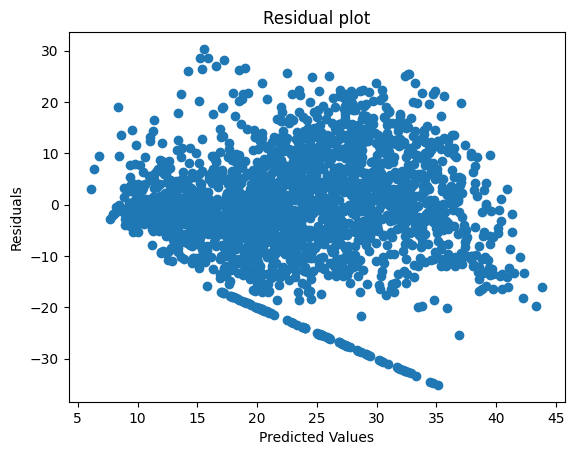

In [ ]:
#Heteroscedasticity - Residual plot
plt.scatter((y_pred_test_lasso),(y_test)-(y_pred_test_lasso))
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual plot')
plt.show()

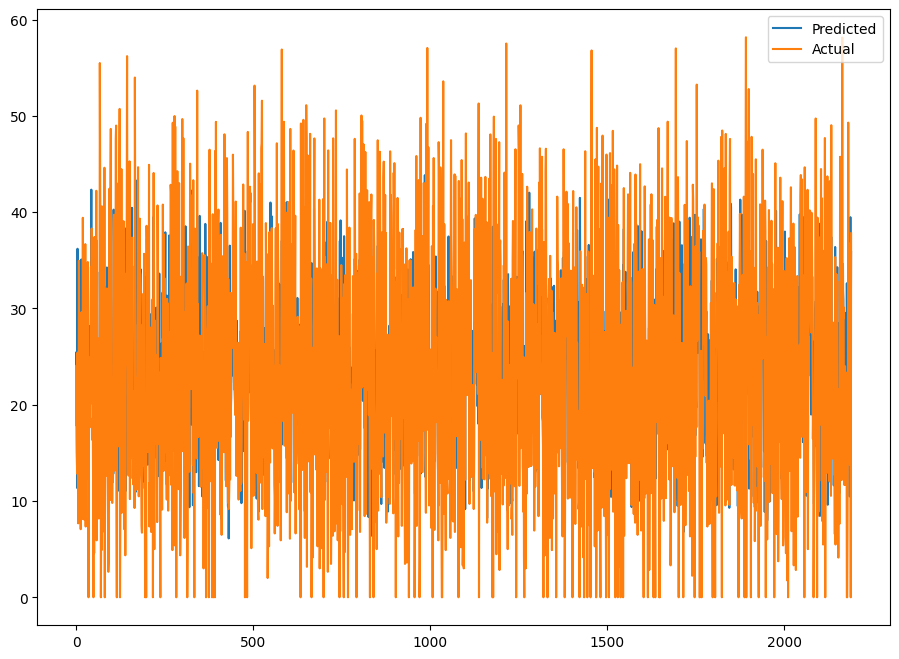

In [ ]:
# Actual price vs predicted price for lasso regression plot
plt.figure(figsize=(11,8))
plt.plot(y_pred_test_lasso)
plt.plot(np.array(y_test))
plt.legend(['Predicted','Actual'])
plt.show()

**ELASTIC NET REGRESSION**

Elastic net regression is a linear model that combines L1 (Lasso) and L2 (Ridge) regularization penalties to overcome some of the the limitations of each individual method.

The model introduce two hyperparameters alpha and l1_ratio, which control the strength of the L1 and L2 penalties, respectively. Elastic net regression is particularly useful when dealing with datasets that have high dimensionality and multicollinearity between features.

In [ ]:
# import the packages
from sklearn.linear_model import ElasticNet
elasticnet = ElasticNet(alpha=0.1, l1_ratio=0.5)

In [ ]:
# Fit the model
elasticnet.fit(X_train, y_train)

ElasticNet(alpha=0.1)

In [ ]:
# lets check the score
elasticnet.score(X_train, y_train)

0.641910450609957

In [ ]:
# Lets check the X_train value and X_test value
y_pred_train_en = elasticnet.predict(X_train)
y_pred_test_en = elasticnet.predict(X_test)

In [ ]:
y_pred_train_en

array([15.68077567, 31.24309653, 17.3320067 , ..., 32.50762556,
       22.63580595, 19.21383635])

In [ ]:
y_pred_test_en

array([19.01670529, 24.63235562, 18.23867345, ..., 39.95161758,
       18.30435149, 32.95386409])

In [ ]:
# let's calculate the MSE
mse_en = mse(y_train, y_pred_train_en)
print('MSE:',mse_en)

# calculate the RMSE
rmse_en = np.sqrt(mse_en)
print('RMSE:',rmse_en)

# calculate mae
mae_en = mae(y_train, y_pred_train_en)
print('MAE:',mae_en)

# calculate the r2 and adjusted r2_score
r2_en = r2(y_train, y_pred_train_en)
print('R2:',r2_en)
Adjusted_R2_en = (1-(1-r2(y_train, y_pred_train_en))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))
print('Adjusted R2:',Adjusted_R2_en)

MSE: 55.14245278133264
RMSE: 7.425796440876402
MAE: 5.653172410366239
R2: 0.641910450609957
Adjusted R2: 0.6340532102638636


We can see train set's r2 score value is 0.64 that means our model is able to capture most of the data variance. Lets save it in a dataframe for later comparison.

In [ ]:
# storing the value in a dataframe for later comparison
dict_1 = {'Model':'Elastic Net Regression',
          'MSE':round((mse_en),3),
          'RMSE':round((rmse_en),3),
          'MAE':round((mae_en),3),
          'R2_score':round((r2_en),3),
          'Adjusted_R2':round((Adjusted_R2_en),2),
          }
training_df=pd.DataFrame(dict_1, index=[1])

In [ ]:
training_df

,Model,MSE,RMSE,MAE,R2_score,Adjusted_R2
1,Elastic Net Regression,55.14,7.43,5.65,0.64,0.63


In [ ]:
# let's calculate the MSE
mse_en = mse(y_test, y_pred_test_en)
print('MSE:',mse_en)

# calculate the RMSE
rmse_en = np.sqrt(mse_en)
print('RMSE:',rmse_en)

# calculate mae
mae_en = mae(y_test, y_pred_test_en)
print('MAE:',mae_en)

# calculate the r2 and adjusted r2_score
r2_en = r2(y_test, y_pred_test_en)
print('R2:',r2_en)
Adjusted_R2_en = (1-(1-r2(y_test, y_pred_test_en))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))
print('Adjusted R2:',Adjusted_R2_en)

MSE: 57.773040965512614
RMSE: 7.600857909835745
MAE: 5.765579824382158
R2: 0.6342700742554702
Adjusted R2: 0.6262451879296098


We can see that test set's r2 score value is 0.63 that means our model is able to capture most of the data variance. Lets try to visualize our residuals and see if there is heteroscedasticity.

In [ ]:
# storing the value in a dataframe for later comparison
dict_2 = {'Model':'Elastic Net Regression',
          'MSE':round((mse_en),3),
          'RMSE':round((rmse_en),3),
          'MAE':round((mae_en),3),
          'R2_score':round((r2_en),3),
          'Adjusted_R2':round((Adjusted_R2_en),2),
          }
testing_df=pd.DataFrame(dict_2, index=[1])

In [ ]:
testing_df

,Model,MSE,RMSE,MAE,R2_score,Adjusted_R2
1,Elastic Net Regression,57.77,7.60,5.77,0.63,0.63


In [ ]:
# displaying the results of eveluation metric values for Elastic net regression with training and testing
result = pd.concat([training_df, testing_df], keys=['Training set','Testing set'])
result

,,Model,MSE,RMSE,MAE,R2_score,Adjusted_R2
Training set,1,Elastic Net Regression,55.14,7.43,5.65,0.64,0.63
Testing set,1,Elastic Net Regression,57.77,7.60,5.77,0.63,0.63


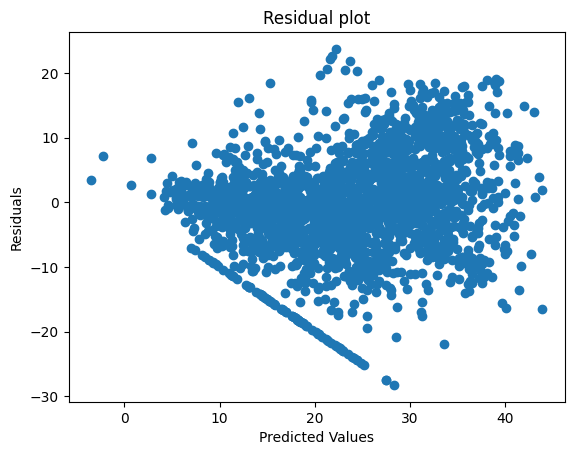

In [ ]:
#Heteroscedasticity - Residual plot
plt.scatter((y_pred_test_en),(y_test)-(y_pred_test_en))
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual plot')
plt.show()

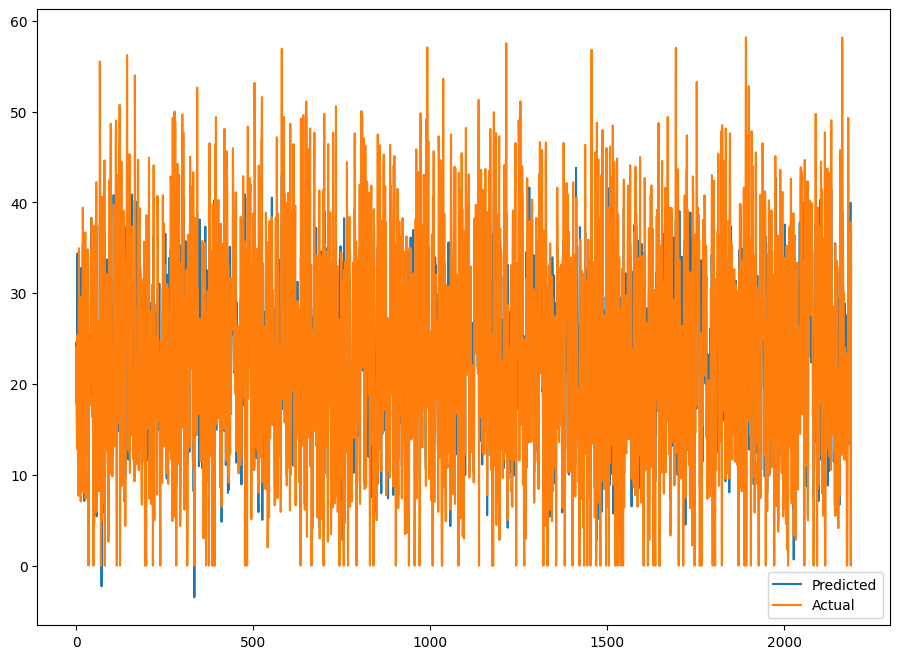

In [ ]:
# Actual price vs predicted price for lasso regression plot
plt.figure(figsize=(11,8))
plt.plot(y_pred_test_en)
plt.plot(np.array(y_test))
plt.legend(['Predicted','Actual'])
plt.show()

##**Conclusion**

During the analysis, we did exploratory data analysis on all the features. first of all we analized our dependent variable 'Rented bike count' and applied transformation as necessary. then examined the categorical variables and removed those with majority of one class. We also studied the numerical variables, calculated therir correlations, distribution and their relationships. We also removed some numerical features that contained mostly 0 values and applied one-hot encoding to the categorical variables.

We used some machine learning algorithm like linear regression, ridge, lasso and elastic net regression. and we also used hyperparameter tuning to enhance the perfomance out model.

We train a model to predict the number of rented bike count is given in weather condition. we do exploratory data analysis on the dataset. We check all the null values in the dataset which was not found in the dataset.We checked the outliers and modified that. We also perform correlation analysis to extract the important and relevant feature set and later perform feature engineering.

The main goal of the project was to stablize bike demand at every hour. Based on the objective, it was found that:

* Bike rental count is high during working days than on weekend.

* Bike demand shows peek around 8-9 AM in the morning and 6 - 7pm in the evening.

* People prefer to rent bike more in summer than in winter.

* Bike demand is more on clear days than on snowy or rainy days.

* Temperature range from 22 to 25(°C) has more demand for bike.

* 'Hour', 'Temperature(°C)', 'Humidity', 'Wind_speed','Visibility ', 'Solar_Radiation', 'Rainfall', 'Snowfall', 'Seasons', 'day of week ' regulates bike demand.


Hurrah! I have successfully completed my supervised machine learning Regression capstone
project !!